In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path to a dataset in Google Drive, everyone needs to have the exact same directory!!!
dataset_path1 = '/content/drive/My Drive//Datasets/celltowers.csv'
dataset_path2 = '/content/drive/My Drive/Datasets/us_disaster_declarations.csv'
dataset_path3 = '/content/drive/My Drive/Datasets/us_disasters_m5.csv'
dataset_path4 = '/content/drive/My Drive/Datasets/Cellular_Towers.csv'
dataset_path5 = '/content/drive/My Drive/Datasets/CellularTowers.csv'
dataset_path6 = '/content/drive/My Drive/Datasets/county_complete.csv'
dataset_path7 = '/content/drive/My Drive/Datasets/NRI_Table_Counties.csv'
dataset_path8 = '/content/drive/My Drive/Datasets/null_county_rows.csv'
dataset_path9 = '/content/drive/My Drive/Datasets/Puert_Rico.csv' # download here: https://drive.google.com/file/d/10nKK-P5xjswtil3_MZsm0fJkLXA47WZc/view?usp=sharing
dataset_path10 = '/content/drive/My Drive/Datasets/population_states.csv' # download here: https://drive.google.com/file/d/1RTN0qMCPZny9rfRxqeQQ9uvLJKPBuiBv/view?usp=sharing
# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Loading the dataset into a Pandas DataFrames
celltowers_df = pd.read_csv(dataset_path1)
disaster_dec_df = pd.read_csv(dataset_path2)
disasters_dec_m5_df = pd.read_csv(dataset_path3)
extracell = pd.read_csv(dataset_path5)
county = pd.read_csv(dataset_path6)
NRI_counties = pd.read_csv(dataset_path7)
null_county_rows = pd.read_csv(dataset_path8)
PR_info = pd.read_csv(dataset_path9, encoding='latin1')
pop_states = pd.read_csv(dataset_path10, encoding='latin1')

In [ ]:
# Assuming you have grouped the DataFrame as mentioned
grouped_counts = celltowers_df.groupby(['address', 'city', 'county', 'state', 'latitude', 'longitude']).size().reset_index(name='Counts')

# Filter groups with more than one occurrence
filtered_groups = grouped_counts[grouped_counts['Counts'] > 1]

# Print or work with the filtered groups as needed
filtered_groups

,address,city,county,state,latitude,longitude,Counts
2,( Manquin) ROUTE 662,MANQUIN,KING WILLIAM,VA,37.735222,-77.135000,2
3,( West Point) 1060 THOMPSON AVE WEST POINT ELE...,WEST POINT,KING WILLIAM,VA,37.559167,-76.796111,2
4,(101st Airborne site) 7548 Transmitter Road,Fort Campbell,MONTGOMERY,TN,36.617472,-87.492722,2
5,(20 Mile Hill) 23125 Midwest Highway,CASPER,NATRONA,WY,43.174167,-106.323889,2
6,(20229 SANDPIPER RD. (153774),Bluford,JEFFERSON,IL,38.328250,-88.770444,2
...,...,...,...,...,...,...,...
14217,along Rt 322 1 mi W of rt 153,Rockton,CLEARFIELD,PA,41.076111,-78.551389,2
14219,"aprox 2 miles north of Dutch John, Utah (108582)",Dutch John,DAGGETT,UT,40.959306,-109.417083,2
14222,in t255 M-89 (44729),Plainwell,ALLEGAN,MI,42.436417,-85.569694,2
14223,"near Bldg 356, Pacific Missle Range Facility ...",Kekaha,KAUAI,HI,22.031528,-159.779944,2


In [ ]:
celltowers_df.shape

(19938, 10)

In [ ]:
celltowers_df.drop_duplicates(subset=['latitude', 'longitude'], inplace=True)


In [ ]:
celltowers_df.shape

(13116, 10)

In [ ]:
celltowers_df['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [ ]:
len(celltowers_df['state'].unique())

51

In [ ]:
disaster_dec_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


# Data Preperation and Visualization for Celltowers Dataset




In [ ]:
celltowers_df.describe()

,id,structure,latitude,longitude
count,13116.000000,13116.000000,13116.000000,13116.000000
mean,23203.698994,81.196478,38.064852,-92.326655
std,13840.614289,34.636271,5.623763,13.215744
min,1.000000,3.000000,19.002139,-165.410278
25%,11055.750000,58.800000,33.805479,-98.188188
50%,23192.500000,80.500000,38.244750,-89.958319
75%,35232.250000,97.500000,41.812813,-83.333354
max,47327.000000,609.600000,65.034250,-3.944389


In [ ]:
celltowers_df.shape

(13116, 10)

In [ ]:
celltowers_df.dtypes

id                  int64
license            object
address            object
city               object
county             object
state              object
structure         float64
structure_type     object
latitude          float64
longitude         float64
dtype: object

In [ ]:
celltowers_df.isnull().sum()

id                0
license           0
address           0
city              0
county            0
state             0
structure         0
structure_type    0
latitude          0
longitude         0
dtype: int64

In [ ]:
celltowers_df['county'] = celltowers_df['county'].str.upper()

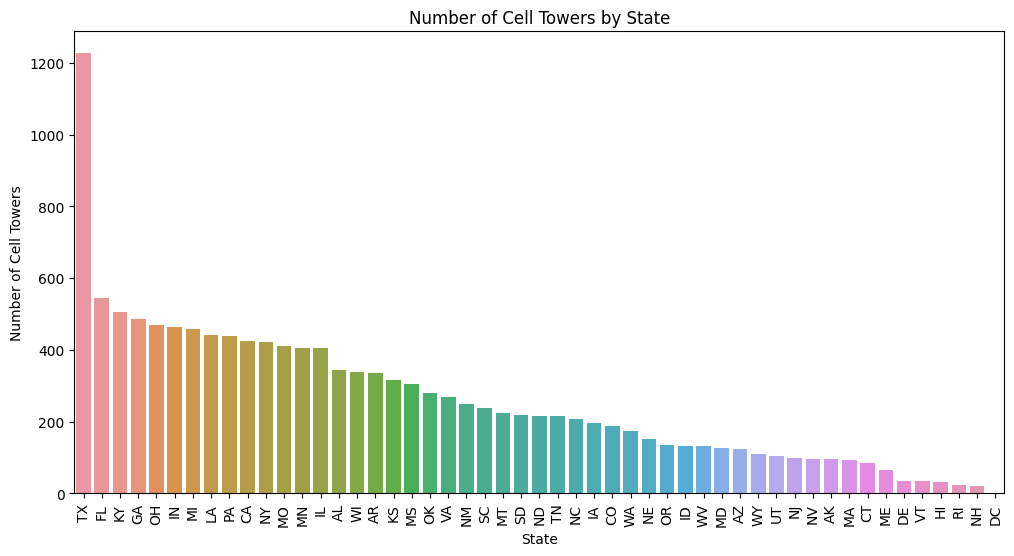

In [ ]:
# Create a density plot of the number of towers in each state
plt.figure(figsize=(12, 6))
sns.countplot(data=celltowers_df, x='state', order=celltowers_df['state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of Cell Towers')
plt.title('Number of Cell Towers by State')
plt.xticks(rotation=90)
plt.show()

In [ ]:
celltowers_df['state'].value_counts().sort_values(ascending=False)

TX    1226
FL     544
KY     507
GA     486
OH     469
IN     464
MI     457
LA     441
PA     440
CA     424
NY     421
MO     412
MN     405
IL     404
AL     344
WI     338
AR     336
KS     316
MS     305
OK     279
VA     268
NM     250
SC     237
MT     224
SD     220
TN     217
ND     217
NC     208
IA     197
CO     188
WA     175
NE     153
OR     134
ID     132
WV     131
MD     127
AZ     124
WY     109
UT     105
NJ     100
NV      96
AK      95
MA      92
CT      84
ME      66
DE      35
VT      34
HI      33
RI      24
NH      22
DC       1
Name: state, dtype: int64

# New Cell Towers Dataset

In [ ]:
celltowers_new = pd.read_csv(dataset_path4)

In [ ]:
celltowers_new.head()

,X,Y,OBJECTID,UniqSysID,Licensee,Callsign,LocNum,LatDeg,LatMin,LatSec,...,QZone,TowReg,SupStruc,AllStruc,StrucType,LicStatus,latdec,londec,url,GlobalID
0,-81.284778,38.637083,1,11497,AT&T Mobility Spectrum LLC,KNKN848,6,38,38,13.5,...,NaN,1002593,123.1,125.6,GTOWER,A,38.637083,-81.284778,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...,{A65E2972-9261-4AAC-890E-BC1CFDA645F2}
1,-81.618028,39.037417,2,11497,AT&T Mobility Spectrum LLC,KNKN848,7,39,2,14.7,...,NaN,0,55.2,59.1,LTOWER,A,39.037417,-81.618028,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...,{EC86215B-9C0D-4D64-9492-438C243898EC}
2,-81.082000,38.959389,3,11497,AT&T Mobility Spectrum LLC,KNKN848,18,38,57,33.8,...,NaN,1274613,121.9,128.0,LTOWER,A,38.959389,-81.082000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...,{86C1DA04-0017-4366-B677-549818E724E7}
3,-81.625000,38.665278,4,11497,AT&T Mobility Spectrum LLC,KNKN848,9,38,39,55.0,...,NaN,1034261,123.1,125.9,GTOWER,A,38.665278,-81.625000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...,{44EC6EF8-CA33-46EB-BF3E-4337D35D588A}
4,-81.915000,38.848444,5,11497,AT&T Mobility Spectrum LLC,KNKN848,10,38,50,54.4,...,NaN,1219729,80.8,83.8,LTOWER,A,38.848444,-81.915000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...,{7E33684A-4EA1-4B04-8D1D-75B73B5DA370}


In [ ]:
celltowers_new.dtypes

X            float64
Y            float64
OBJECTID       int64
UniqSysID      int64
Licensee      object
Callsign      object
LocNum         int64
LatDeg         int64
LatMin         int64
LatSec       float64
LatDir        object
LonDeg         int64
LonMin         int64
LonSec       float64
LonDir        object
LocAdd        object
LocCity       object
LocCounty     object
LocState      object
Nepa          object
QZone         object
TowReg         int64
SupStruc     float64
AllStruc     float64
StrucType     object
LicStatus     object
latdec       float64
londec       float64
url           object
GlobalID      object
dtype: object

In [ ]:
celltowers_new['LocState'].value_counts().sort_values(ascending=False)

TX    1843
CA    1075
FL     899
WI     813
NC     774
KY     718
OH     702
MI     701
MO     688
IL     686
GA     668
IA     639
NY     636
VA     634
OK     623
LA     601
TN     593
PA     585
MN     573
IN     571
KS     535
AL     506
WA     503
CO     481
AR     468
MS     464
AK     458
AZ     439
SC     415
NM     413
MT     376
OR     336
WY     328
NE     325
SD     307
ND     279
ID     258
WV     246
NV     240
UT     222
MD     218
ME     212
NJ     170
NH     145
MA     143
CT     114
PR      88
GM      79
HI      69
VT      68
DE      47
RI      29
VI      13
MP      12
GU      10
AS       5
DC       3
UM       1
Name: LocState, dtype: int64

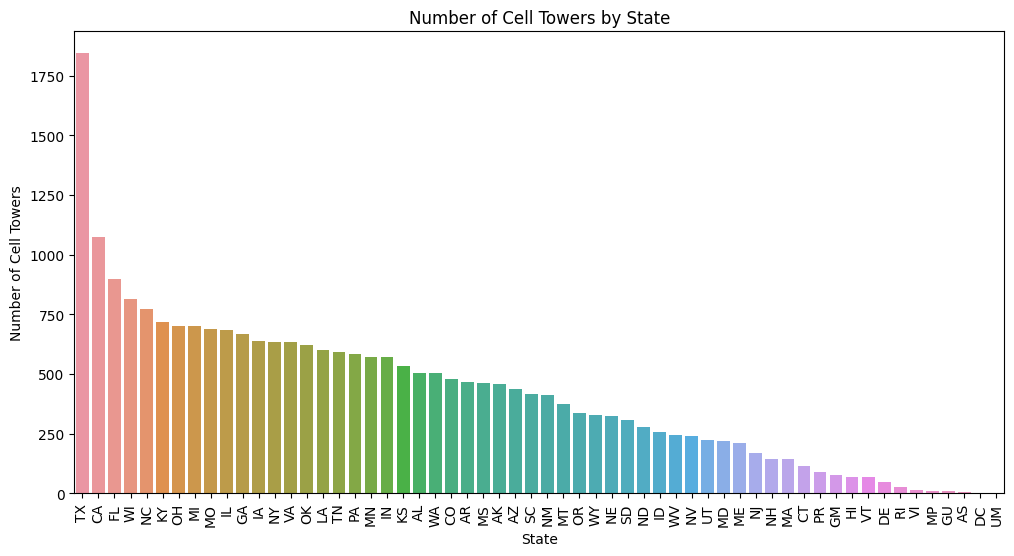

In [ ]:
# Create a density plot of the number of towers in each state
plt.figure(figsize=(12, 6))

sns.countplot(data=celltowers_new, x='LocState', order=celltowers_new['LocState'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of Cell Towers')
plt.title('Number of Cell Towers by State')
plt.xticks(rotation=90)
plt.show()

In [ ]:
celltowers_new['LocCounty'] = celltowers_new['LocCounty'].str.upper()


In [ ]:
celltowers_new.shape

(24047, 30)

In [ ]:
tower_county_state = celltowers_new.groupby(['LocState', 'LocCounty', 'latdec', 'londec']).size().reset_index(name='count')
print(tower_county_state.shape)
tower_county_state.head(20)

(22082, 5)


,LocState,LocCounty,latdec,londec,count
0,AK,,53.875806,-166.542444,1
1,AK,,57.565917,-157.578194,1
2,AK,,58.203417,-157.360722,1
3,AK,,58.999528,-158.545806,1
4,AK,,60.524472,-145.695333,1
5,AK,,60.524722,-145.695278,1
6,AK,,60.552778,-145.732500,1
7,AK,,64.037389,-145.729556,1
8,AK,,64.878444,-148.055222,1
9,AK,,70.126500,-143.616944,1


In [ ]:
filtered_groups = tower_county_state[tower_county_state['count'] > 1]
filtered_groups

,LocState,LocCounty,latdec,londec,count
27,AK,ANCHORAGE,60.832778,-148.977222,3
68,AK,BETHEL,60.695833,-161.982500,2
69,AK,BETHEL,60.707111,-161.764639,2
70,AK,BETHEL,60.781611,-161.883778,3
72,AK,BETHEL,60.791750,-161.775083,2
...,...,...,...,...,...
22043,WY,TETON,43.749389,-110.065750,2
22060,WY,UINTA,41.281333,-110.705444,2
22063,WY,UINTA,41.308833,-110.336833,2
22067,WY,UINTA,41.351611,-110.907111,2


In [ ]:
# Rename columns in celltowers to match celltowers_df
celltowers_new.rename(columns={'LocAdd': 'address', 'LocCity': 'city', 'LocCounty': 'county', 'LocState': 'state', 'latdec': 'latitude', 'londec': 'longitude'}, inplace=True)

# Select the columns you want to keep from each DataFrame
celltowers_df_selected = celltowers_df[['address', 'city', 'county', 'state', 'latitude', 'longitude']]
celltowers_selected = celltowers_new[['address', 'city', 'county', 'state', 'latitude', 'longitude']]

# Merge the two DataFrames based on common columns 'address', 'city', 'county', and 'state'
new_celltowers = pd.concat([celltowers_df_selected, celltowers_selected], ignore_index=True).drop_duplicates(subset=['latitude', 'longitude'])

new_celltowers

,address,city,county,state,latitude,longitude
0,"S3, T12N, R10W (101378)",Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806
1,MP 179 Parks Hwy (101380),Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000
2,8751 EAST MILE 6 ROAD (94021),Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194
3,HC01 Box 2547 (101366),Glennallen,VALDEZ-CORDOVA,AK,62.027389,-146.635556
4,65855 Dimond Ridge Road (93995),Homer,KENAI PENINSULA,AK,59.680472,-151.624333
...,...,...,...,...,...,...
37156,Near intersection of US Rte. 212 & Hwy. 39,Lame Deer,ROSEBUD,MT,45.622056,-106.665333
37157,"18 MILES SSE OF GRAND ISLE, LA",GULF OF MEXICO,,GM,29.000806,-89.858944
37158,"APPROX. 51 MILES SW OF VENICE, LA MC-268",GULF OF MEXICO,,GM,28.652750,-89.786444
37161,"30.5 mi. N. of US 60, on west side of SR 169",Alamo,SOCORRO,NM,34.417917,-107.497611


In [ ]:
# Group by multiple columns and count occurrences
grouped_counts = new_celltowers.groupby(['address', 'city', 'county', 'state', 'latitude', 'longitude']).size().reset_index(name='Counts')

# Print or work with the grouped counts as needed
grouped_counts

,address,city,county,state,latitude,longitude,Counts
0,,BARLING,SEBASTIAN,AR,35.228972,-94.262722,1
1,,Cocos Island,,GU,13.239167,144.654167,1
2,#3 Liberty Park,Harlowton,WHEATLAND,MT,46.438972,-109.819833,1
3,#3 Prospect Hill (98659),Avery Island,IBERIA,LA,29.904111,-91.902806,1
4,#30 Cross 503 (70735),FAIR OAKS,CROSS,AR,35.248944,-91.028833,1
...,...,...,...,...,...,...,...
22099,w2202 Town Hall Rd (Springbrook Cell Site),Hayward,WASHBURN,WI,45.957833,-91.649472,1
22100,within,EMMONAK,WADE HAMPTON,AK,62.776972,-164.537167,1
22101,within community of Tuntutuliak,Tuntutliak,BETHEL,AK,60.341472,-162.666694,1
22102,within the community of Scammon Bay,Scammon Bay,WADE HAMPTON,AK,61.843306,-165.581194,1


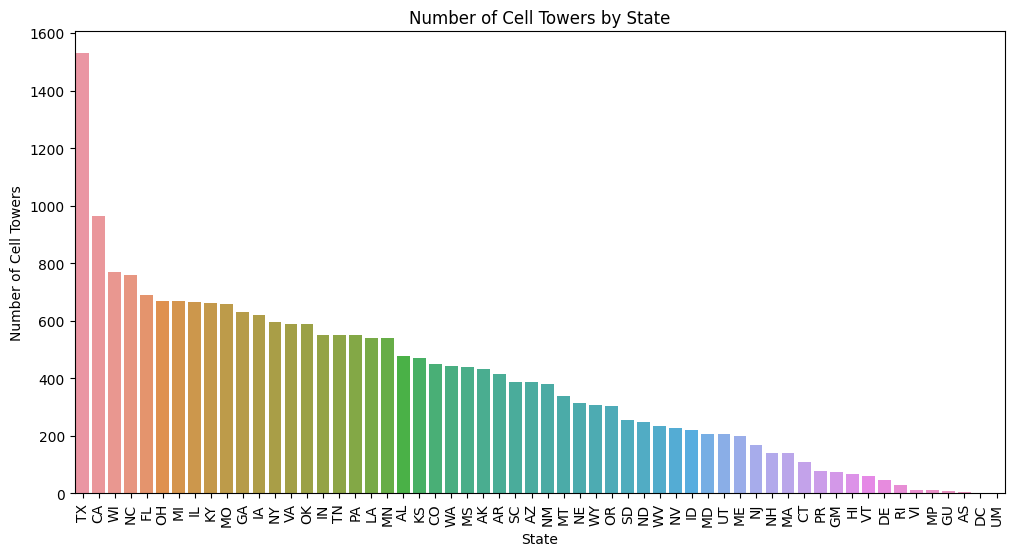

In [ ]:

# Create a density plot of the number of towers in each state
plt.figure(figsize=(12, 6))

sns.countplot(data=new_celltowers, x='state', order=new_celltowers['state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of Cell Towers')
plt.title('Number of Cell Towers by State')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Location of Celltowers')

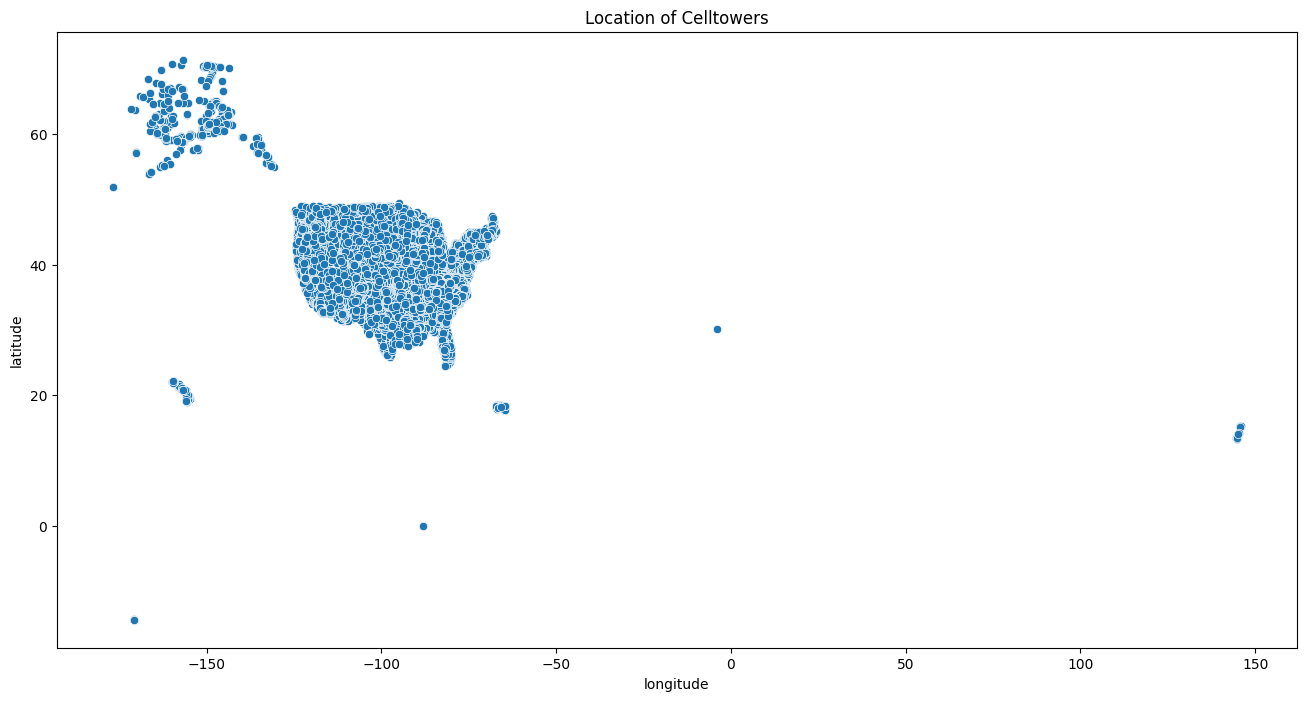

In [ ]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data = new_celltowers, x = "longitude", y = "latitude")
plt.title("Location of Celltowers")


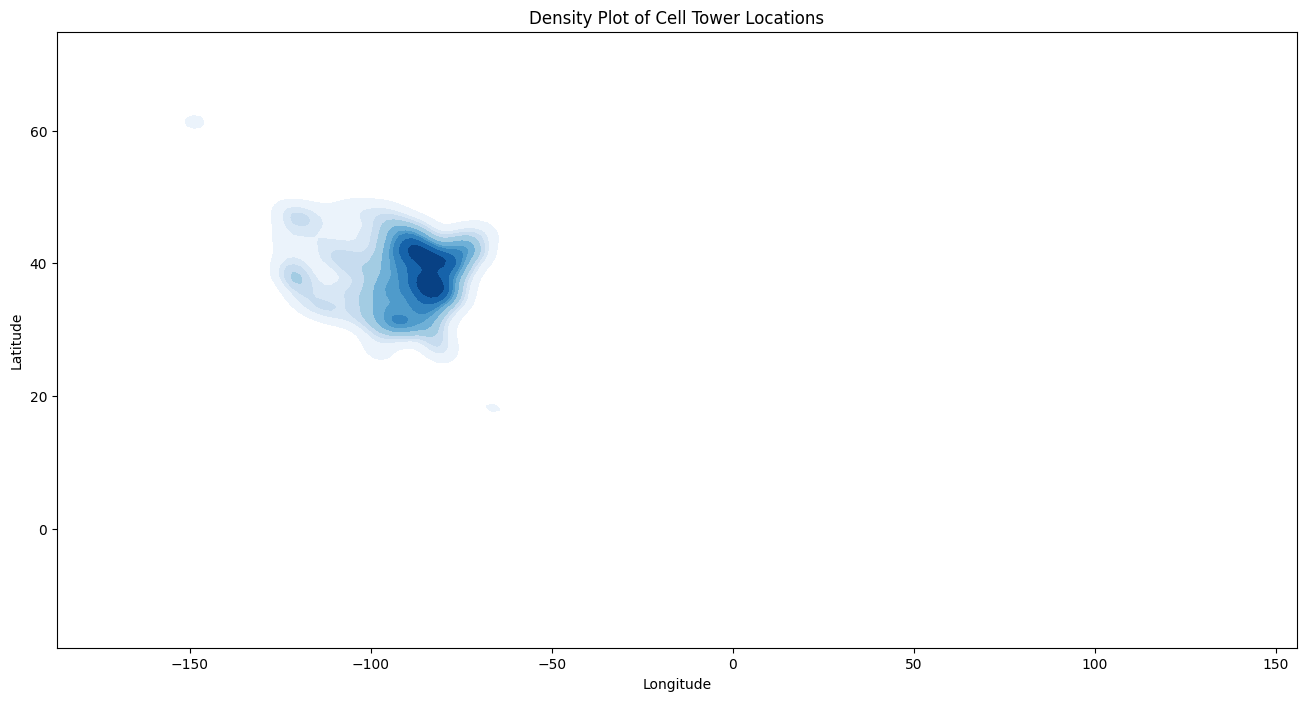

In [ ]:
plt.figure(figsize=(16, 8))

# 2D kernel density estimate plot
sns.kdeplot(data=new_celltowers, x="longitude", y="latitude", cmap="Blues", fill=True)

plt.title("Density Plot of Cell Tower Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()



## Data Preperation and Visualization for Disaster Dataset

In [ ]:
disaster_dec_df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000
mean,2577.105364,2004.339996,0.168087,0.268161,0.932035,0.431489,31705.675638,96373.283733,35025.917306
std,1405.535733,14.785293,0.373946,0.443006,0.251687,0.495288,16642.418797,13940.282164,34956.137681
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1316.000000,1997.000000,0.000000,0.000000,1.000000,0.000000,19183.000000,99029.000000,8151.000000
50%,3057.000000,2007.000000,0.000000,0.000000,1.000000,0.000000,30036.000000,99071.000000,20026.000000
75%,3546.000000,2018.000000,0.000000,1.000000,1.000000,1.000000,46075.000000,99123.000000,74028.000000
max,5457.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


In [ ]:
disaster_dec_df.shape

(64092, 23)

In [ ]:
disaster_dec_df.dtypes

fema_declaration_string       object
disaster_number                int64
state                         object
declaration_type              object
declaration_date              object
fy_declared                    int64
incident_type                 object
declaration_title             object
ih_program_declared            int64
ia_program_declared            int64
pa_program_declared            int64
hm_program_declared            int64
incident_begin_date           object
incident_end_date             object
disaster_closeout_date        object
fips                           int64
place_code                     int64
designated_area               object
declaration_request_number     int64
last_ia_filing_date           object
last_refresh                  object
hash                          object
id                            object
dtype: object

In [ ]:
disaster_dec_df.isnull().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8410
disaster_closeout_date        15180
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
last_ia_filing_date           46339
last_refresh                      0
hash                              0
id                                0
dtype: int64

In [ ]:
rows_with_missing_data = disaster_dec_df[disaster_dec_df.isnull().any(axis=1)]
rows_with_missing_data


,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64087,DR-4696-ME,4696,ME,DR,2023-03-22T00:00:00Z,2023,Severe Storm,Severe Storm And Flooding,0,0,...,2022-12-24T00:00:00Z,NaN,23031,99031,"York (County)(in MSA 6400,6450)",23013,NaN,2023-03-23T22:31:41Z,c6ed4ead7fd3bee8113ef15d9110e845c56a8b2f,3bd84f66-74d0-4e4a-9287-2414fda89014
64088,DR-4697-MS,4697,MS,DR,2023-03-26T00:00:00Z,2023,Severe Storm,"Severe Storms, Straight-Line Winds, And Tornadoes",1,0,...,2023-03-25T00:00:00Z,NaN,28015,99015,Carroll (County),23025,2023-05-25T00:00:00Z,2023-03-26T06:41:23Z,9ccd8b25b2e64d4e44a043b1da61f3c42e2d02a9,764fa617-efd9-44c4-9d4a-c48e972b485c
64089,DR-4697-MS,4697,MS,DR,2023-03-26T00:00:00Z,2023,Severe Storm,"Severe Storms, Straight-Line Winds, And Tornadoes",1,0,...,2023-03-25T00:00:00Z,NaN,28053,99053,Humphreys (County),23025,2023-05-25T00:00:00Z,2023-03-26T06:41:23Z,62d6f324279680dbb6b1eb2ce91a9bf5ae964e24,c9300696-062b-430f-9f9d-3ad6b1562779
64090,DR-4697-MS,4697,MS,DR,2023-03-26T00:00:00Z,2023,Severe Storm,"Severe Storms, Straight-Line Winds, And Tornadoes",1,0,...,2023-03-25T00:00:00Z,NaN,28095,99095,Monroe (County),23025,2023-05-25T00:00:00Z,2023-03-26T06:41:23Z,5cb6b2789fc77375f0a1d0e1a8898a1ce3dfc952,df697ed2-4c59-4d02-84e7-d4e84d6e2723


In [ ]:
disaster_dec_df_copy = disaster_dec_df.copy()
# Create new start date column with date time object
disaster_dec_df_copy['start_date'] = pd.to_datetime(disaster_dec_df_copy['incident_begin_date'])

disaster_dec_df_copy.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,start_date
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02 00:00:00+00:00
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15 00:00:00+00:00
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29 00:00:00+00:00
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02 00:00:00+00:00
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06 00:00:00+00:00


In [ ]:
#check if the end date is not missing
disaster_dec_df_copy = disaster_dec_df_copy[~disaster_dec_df_copy['incident_end_date'].isna()]

# Convert end date to date time object
disaster_dec_df_copy['end_date'] = pd.to_datetime(disaster_dec_df_copy['incident_end_date'])

disaster_dec_df_copy.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,start_date,end_date
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02 00:00:00+00:00,1953-05-02 00:00:00+00:00
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15 00:00:00+00:00,1953-05-15 00:00:00+00:00
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29 00:00:00+00:00,1953-05-29 00:00:00+00:00
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02 00:00:00+00:00,1953-06-02 00:00:00+00:00
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06 00:00:00+00:00,1953-06-06 00:00:00+00:00


In [ ]:


# Calculate the duration by subtracting
disaster_dec_df_copy['duration'] = disaster_dec_df_copy['end_date'] - disaster_dec_df_copy['start_date']

disaster_dec_df_copy.head(50)

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,start_date,end_date,duration
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02 00:00:00+00:00,1953-05-02 00:00:00+00:00,0 days
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15 00:00:00+00:00,1953-05-15 00:00:00+00:00,0 days
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29 00:00:00+00:00,1953-05-29 00:00:00+00:00,0 days
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02 00:00:00+00:00,1953-06-02 00:00:00+00:00,0 days
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06 00:00:00+00:00,1953-06-06 00:00:00+00:00,0 days
5,DR-6-MI,6,MI,DR,1953-06-09T00:00:00Z,1953,Tornado,Tornado,0,1,...,0,Statewide,53007,NaN,2023-03-18T13:22:03Z,7c4aed555c671a56be96b52ef381cbf77f5a0ffb,9c154074-6937-473b-8b22-8fe3f54c9998,1953-06-09 00:00:00+00:00,1953-06-09 00:00:00+00:00,0 days
6,DR-8-IA,8,IA,DR,1953-06-11T00:00:00Z,1953,Flood,Flood,0,1,...,0,Statewide,53008,NaN,2023-03-18T13:22:03Z,84c3cb7dc6a8de3f96ff4a181969c463f924fd08,0d456d0c-8aa5-4fe8-8ee0-44a2d2dd742c,1953-06-11 00:00:00+00:00,1953-06-11 00:00:00+00:00,0 days
7,DR-7-MA,7,MA,DR,1953-06-11T00:00:00Z,1953,Tornado,Tornado,0,1,...,0,Statewide,53009,NaN,2023-03-18T13:22:03Z,07afc590f5515b8bce699454d205b7aa46297190,7c0a5849-631d-4170-93a3-7c4306dde9c8,1953-06-11 00:00:00+00:00,1953-06-11 00:00:00+00:00,0 days
8,DR-9-TX,9,TX,DR,1953-06-19T00:00:00Z,1953,Flood,Flood,0,1,...,0,Statewide,53010,NaN,2023-03-18T13:22:03Z,2efe53c0051ff2f4af480b60b0d94ad6f1fe5611,2277957b-7a84-4abf-9e05-5fd66cbda7b3,1953-06-19 00:00:00+00:00,1953-06-19 00:00:00+00:00,0 days
9,DR-11-NH,11,NH,DR,1953-07-02T00:00:00Z,1953,Fire,Forest Fire,0,1,...,0,Statewide,53011,NaN,2023-03-18T13:22:03Z,942572c0d5e6acb5766fe079af4f9989ec70ffba,c7799d1d-70a7-4b5c-ae77-7dbc65d9be40,1953-07-02 00:00:00+00:00,1953-07-02 00:00:00+00:00,0 days


In [ ]:
unique_values = disaster_dec_df_copy['duration'].unique()
print(unique_values)

[                 0    172800000000000    604800000000000
   1728000000000000    950400000000000   1814400000000000
   5875200000000000  19872000000000000    345600000000000
     86400000000000    259200000000000   1468800000000000
   1209600000000000   7689600000000000   8121600000000000
    432000000000000    518400000000000    864000000000000
   1555200000000000   3542400000000000   1987200000000000
   1123200000000000   2246400000000000   2160000000000000
   4233600000000000   1641600000000000   1036800000000000
   2592000000000000   2073600000000000   2332800000000000
   2851200000000000    777600000000000   1382400000000000
   4320000000000000   1296000000000000   4406400000000000
   4665600000000000   3456000000000000   2678400000000000
   2937600000000000    691200000000000   5356800000000000
   3801600000000000   4147200000000000 442108800000000000
   3196800000000000   5011200000000000   2764800000000000
   3024000000000000   3110400000000000   2505600000000000
  139104000000

In [ ]:
disaster_dec_df_copy.shape

(55682, 26)

In [ ]:

# Create a boolean mask for rows with negative duration
negative_duration = disaster_dec_df_copy['duration'].dt.days < 0

# Filter the DataFrame to get rows with negative duration
rows_with_negative_duration = disaster_dec_df_copy[negative_duration]

# Print the rows with negative duration
# Which means end date is before start date.
rows_with_negative_duration.head()



,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,start_date,end_date,duration
17211,FM-2199-TX,2199,TX,FM,1998-05-15T00:00:00Z,1998,Fire,Cibolo Creek Fire,0,0,...,0,Statewide,98039,NaN,2023-03-18T13:22:03Z,7e8366a318eef4c681fa4830587f9c049b6f1a39,f3864014-4fc8-48e8-b98b-708eda8f598c,1998-05-20 00:00:00+00:00,1998-05-13 00:00:00+00:00,-7 days
17256,FM-2202-TX,2202,TX,FM,1998-06-18T00:00:00Z,1998,Fire,Paradise Fire,0,0,...,0,Statewide,98060,NaN,2023-03-18T13:22:03Z,dcf15bfe820d26e9ad09ef07dde4607b10579f01,b2a7fcce-daf0-43ca-969f-5d3add5aea53,1998-06-22 00:00:00+00:00,1998-06-18 00:00:00+00:00,-4 days


In [ ]:
# Drop these rows to make the data cleaned.
disaster_dec_df_copy = disaster_dec_df_copy.drop(rows_with_negative_duration.index)

disaster_dec_df_copy.shape

(55680, 26)

In [ ]:
# Check whether these wrong rows removed.
unique_values = disaster_dec_df_copy['duration'].unique()
print(unique_values)

[                 0    172800000000000    604800000000000
   1728000000000000    950400000000000   1814400000000000
   5875200000000000  19872000000000000    345600000000000
     86400000000000    259200000000000   1468800000000000
   1209600000000000   7689600000000000   8121600000000000
    432000000000000    518400000000000    864000000000000
   1555200000000000   3542400000000000   1987200000000000
   1123200000000000   2246400000000000   2160000000000000
   4233600000000000   1641600000000000   1036800000000000
   2592000000000000   2073600000000000   2332800000000000
   2851200000000000    777600000000000   1382400000000000
   4320000000000000   1296000000000000   4406400000000000
   4665600000000000   3456000000000000   2678400000000000
   2937600000000000    691200000000000   5356800000000000
   3801600000000000   4147200000000000 442108800000000000
   3196800000000000   5011200000000000   2764800000000000
   3024000000000000   3110400000000000   2505600000000000
  139104000000

In [ ]:
# Remove last_ia_filling_date column ---> 83% NA values
disaster_dec_df_copy = disaster_dec_df_copy.drop(columns = 'last_ia_filing_date', axis=1)

In [ ]:
disaster_dec_df_copy.shape

(55680, 25)

## **Using one-hot encoding:**




In [ ]:
print(disaster_dec_df_copy['declaration_type'].unique())
print(disaster_dec_df_copy['declaration_type']. value_counts())

['DR' 'FM' 'EM']
DR    39100
EM    15198
FM     1382
Name: declaration_type, dtype: int64


In [ ]:
# One-hot encoding
disaster_dec_df_copy = pd.get_dummies(disaster_dec_df_copy, columns=['declaration_type'])

In [ ]:
disaster_dec_df_copy.shape

(55680, 27)

In [ ]:
disaster_dec_df_copy.head(20)

,fema_declaration_string,disaster_number,state,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,...,declaration_request_number,last_refresh,hash,id,start_date,end_date,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM
0,DR-1-GA,1,GA,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,1,...,53013,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02 00:00:00+00:00,1953-05-02 00:00:00+00:00,0 days,1,0,0
1,DR-2-TX,2,TX,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,1,...,53003,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15 00:00:00+00:00,1953-05-15 00:00:00+00:00,0 days,1,0,0
2,DR-3-LA,3,LA,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,1,...,53005,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29 00:00:00+00:00,1953-05-29 00:00:00+00:00,0 days,1,0,0
3,DR-4-MI,4,MI,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,1,...,53004,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02 00:00:00+00:00,1953-06-02 00:00:00+00:00,0 days,1,0,0
4,DR-5-MT,5,MT,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,1,...,53006,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06 00:00:00+00:00,1953-06-06 00:00:00+00:00,0 days,1,0,0
5,DR-6-MI,6,MI,1953-06-09T00:00:00Z,1953,Tornado,Tornado,0,1,1,...,53007,2023-03-18T13:22:03Z,7c4aed555c671a56be96b52ef381cbf77f5a0ffb,9c154074-6937-473b-8b22-8fe3f54c9998,1953-06-09 00:00:00+00:00,1953-06-09 00:00:00+00:00,0 days,1,0,0
6,DR-8-IA,8,IA,1953-06-11T00:00:00Z,1953,Flood,Flood,0,1,1,...,53008,2023-03-18T13:22:03Z,84c3cb7dc6a8de3f96ff4a181969c463f924fd08,0d456d0c-8aa5-4fe8-8ee0-44a2d2dd742c,1953-06-11 00:00:00+00:00,1953-06-11 00:00:00+00:00,0 days,1,0,0
7,DR-7-MA,7,MA,1953-06-11T00:00:00Z,1953,Tornado,Tornado,0,1,1,...,53009,2023-03-18T13:22:03Z,07afc590f5515b8bce699454d205b7aa46297190,7c0a5849-631d-4170-93a3-7c4306dde9c8,1953-06-11 00:00:00+00:00,1953-06-11 00:00:00+00:00,0 days,1,0,0
8,DR-9-TX,9,TX,1953-06-19T00:00:00Z,1953,Flood,Flood,0,1,1,...,53010,2023-03-18T13:22:03Z,2efe53c0051ff2f4af480b60b0d94ad6f1fe5611,2277957b-7a84-4abf-9e05-5fd66cbda7b3,1953-06-19 00:00:00+00:00,1953-06-19 00:00:00+00:00,0 days,1,0,0
9,DR-11-NH,11,NH,1953-07-02T00:00:00Z,1953,Fire,Forest Fire,0,1,1,...,53011,2023-03-18T13:22:03Z,942572c0d5e6acb5766fe079af4f9989ec70ffba,c7799d1d-70a7-4b5c-ae77-7dbc65d9be40,1953-07-02 00:00:00+00:00,1953-07-02 00:00:00+00:00,0 days,1,0,0


##**Doing Lemmetization or stemming for text columns: declaration_title and incident_type:**

In [ ]:
disaster_type = disaster_dec_df_copy['incident_type'].unique().tolist()
print(disaster_type)
print(disaster_dec_df_copy['incident_type']. value_counts())

['Tornado', 'Flood', 'Fire', 'Other', 'Earthquake', 'Hurricane', 'Volcanic Eruption', 'Severe Storm', 'Toxic Substances', 'Typhoon', 'Drought', 'Dam/Levee Break', 'Snowstorm', 'Severe Ice Storm', 'Freezing', 'Coastal Storm', 'Fishing Losses', 'Mud/Landslide', 'Human Cause', 'Terrorist', 'Tsunami', 'Chemical', 'Tropical Storm', 'Winter Storm']
Severe Storm         17490
Hurricane            13030
Flood                10650
Snowstorm             3707
Fire                  3126
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          637
Other                  306
Freezing               301
Earthquake             228
Typhoon                130
Volcanic Eruption       51
Tropical Storm          47
Winter Storm            43
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Toxic Substances         9
Tsunami                  9
Chemical                 9
Human Cause              7
Terrorist                5
Name: i

In [ ]:
print(disaster_dec_df_copy['declaration_title'].unique())
print(disaster_dec_df_copy['declaration_title'].value_counts())

['Tornado' 'Tornado & Heavy Rainfall' 'Flood' ... 'Tropical Storm Nicole'
 'Hurricane Nicole'
 'Severe Winter Storm, Snowstorm, And Straight-Line Winds']
Severe Storms And Flooding                3826
Severe Storms & Flooding                  3387
Hurricane Katrina Evacuation              2602
Severe Winter Storm                       2387
Severe Storms, Tornadoes, And Flooding    1888
                                          ... 
Ak-Bolgen Creek Fire-08-10-2004              1
Ca-Stevens Fire-08--8-2004                   1
Ca-Calaveras Complex-08-07-2004              1
Or-Redwood Highway Wildfire-08-04-2004       1
New Archer Fire                              1
Name: declaration_title, Length: 1971, dtype: int64


In [ ]:
# Lowercase columns:incident_type
disaster_dec_df_copy['incident_type'] = disaster_dec_df_copy['incident_type'].str.lower()

# Drop declaration_title
disaster_dec_df_copy.drop(columns='declaration_title', inplace=True)

In [ ]:
disaster_dec_df_copy.head()

,fema_declaration_string,disaster_number,state,declaration_date,fy_declared,incident_type,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,...,declaration_request_number,last_refresh,hash,id,start_date,end_date,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM
0,DR-1-GA,1,GA,1953-05-02T00:00:00Z,1953,tornado,0,1,1,1,...,53013,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02 00:00:00+00:00,1953-05-02 00:00:00+00:00,0 days,1,0,0
1,DR-2-TX,2,TX,1953-05-15T00:00:00Z,1953,tornado,0,1,1,1,...,53003,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15 00:00:00+00:00,1953-05-15 00:00:00+00:00,0 days,1,0,0
2,DR-3-LA,3,LA,1953-05-29T00:00:00Z,1953,flood,0,1,1,1,...,53005,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29 00:00:00+00:00,1953-05-29 00:00:00+00:00,0 days,1,0,0
3,DR-4-MI,4,MI,1953-06-02T00:00:00Z,1953,tornado,0,1,1,1,...,53004,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02 00:00:00+00:00,1953-06-02 00:00:00+00:00,0 days,1,0,0
4,DR-5-MT,5,MT,1953-06-06T00:00:00Z,1953,flood,0,1,1,1,...,53006,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06 00:00:00+00:00,1953-06-06 00:00:00+00:00,0 days,1,0,0


**Testing Stellar:**
> Questions:
* Is `declaration_title` column useful for any purpose:
  *   Specific types of disasters that occured.
* While `incident_type` has only 1 main disaster type that occured.
* Is it possible to use one-hot encoding for `incident_type` columns?




In [ ]:
'''# Testing
test_data = pd.DataFrame()
test_data['incident_type'] = disaster_dec_df_copy['incident_type'].copy().str.lower()
test_data['declaration_title'] = disaster_dec_df_copy['declaration_title'].copy().str.lower()
test_data.head(30)'''


"# Testing\ntest_data = pd.DataFrame()\ntest_data['incident_type'] = disaster_dec_df_copy['incident_type'].copy().str.lower()\ntest_data['declaration_title'] = disaster_dec_df_copy['declaration_title'].copy().str.lower()\ntest_data.head(30)"

In [ ]:
'''import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
# Stopwords set
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  # Define the regular expression pattern to split by comma, "and", or "&"
  pattern = r'[,&]|(?:\band\b)'

  # Split the text using the pattern
  words = re.split(pattern, text)

  # Remove stop words
  filtered_words = [word.strip() for word in words if word.strip() not in stop_words and word not in string.punctuation]

  # Replace stop words with commas
  cleaned_text = ', '.join(filtered_words)

  return cleaned_text

test_data['declaration_title'] = test_data['declaration_title'].apply(remove_stopwords)'''

'import nltk\nfrom nltk.stem import WordNetLemmatizer\nfrom nltk.corpus import stopwords\nimport string\nimport re\n\nnltk.download(\'stopwords\')\nnltk.download(\'punkt\')\nnltk.download(\'wordnet\')\n# Initialize the WordNet lemmatizer\nlemmatizer = WordNetLemmatizer()\n# Stopwords set\nstop_words = set(stopwords.words(\'english\'))\n\ndef remove_stopwords(text):\n  # Define the regular expression pattern to split by comma, "and", or "&"\n  pattern = r\'[,&]|(?:\x08and\x08)\'\n\n  # Split the text using the pattern\n  words = re.split(pattern, text)\n\n  # Remove stop words\n  filtered_words = [word.strip() for word in words if word.strip() not in stop_words and word not in string.punctuation]\n\n  # Replace stop words with commas\n  cleaned_text = \', \'.join(filtered_words)\n\n  return cleaned_text\n\ntest_data[\'declaration_title\'] = test_data[\'declaration_title\'].apply(remove_stopwords)'

In [ ]:
# test_data.head(40)

**Note**: The correlation between disaster type and density of cell towers:
*  **Positive correlation**: incident type more likelly occur in are with higher density of cell towers.
*   **Negative correlation**: incident type are associated with reduced cell towers coverage.

*  *severe weather events like hurricanes or tornadoes can
  damage cell towers, leading to temporary unavailability.*



  



##**Calculate summary statistics (e.g., mean, median) for the number of cell towers, grouped by common columns such as "state"**

In [ ]:
# Counting the value of cell towers for each state
tower_counts = new_celltowers['state'].value_counts().reset_index()

# Rename the columns
tower_counts.columns = ['state', 'tower_count']

In [ ]:
# Merge tower_counts back into your disaster declarations DataFrame
new_disaster = pd.merge(disaster_dec_df_copy, tower_counts, on='state', how='inner')

new_disaster.head(30)

,fema_declaration_string,disaster_number,state,declaration_date,fy_declared,incident_type,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,...,last_refresh,hash,id,start_date,end_date,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,tower_count
0,DR-1-GA,1,GA,1953-05-02T00:00:00Z,1953,tornado,0,1,1,1,...,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02 00:00:00+00:00,1953-05-02 00:00:00+00:00,0 days,1,0,0,632
1,DR-16-GA,16,GA,1954-03-17T00:00:00Z,1954,tornado,0,1,1,1,...,2023-03-18T13:22:03Z,0c3971d707504f1f32089d38a04dd1e3a86e5d0e,5749d536-ce71-4849-9fc3-8c602c7e6afe,1954-03-17 00:00:00+00:00,1954-03-17 00:00:00+00:00,0 days,1,0,0,632
2,DR-110-GA,110,GA,1961-03-02T00:00:00Z,1961,flood,0,1,1,1,...,2023-03-18T13:22:03Z,1cb197433e709f7b06fb700f3629b5b11638242a,875447b8-d3e7-479a-8ce4-bc9d93ce6a1e,1961-03-02 00:00:00+00:00,1961-03-02 00:00:00+00:00,0 days,1,0,0,632
3,DR-150-GA,150,GA,1963-03-26T00:00:00Z,1963,flood,0,1,1,1,...,2023-03-18T13:22:03Z,a91154f35eac0c8ed0bd260c410183f109462ef7,0adc7f59-b4da-44cf-88dd-cc9aab2b3ee8,1963-03-26 00:00:00+00:00,1963-03-26 00:00:00+00:00,0 days,1,0,0,632
4,DR-177-GA,177,GA,1964-09-10T00:00:00Z,1964,hurricane,0,1,1,1,...,2023-03-18T13:22:03Z,d04636dd38874ad9c7bc6716b19bc1ef59617166,c998acad-dce4-4002-a9e9-ecbeed0589aa,1964-09-10 00:00:00+00:00,1964-09-10 00:00:00+00:00,0 days,1,0,0,632
5,DR-180-GA,180,GA,1964-11-04T00:00:00Z,1965,flood,0,1,1,1,...,2023-03-18T13:22:03Z,7d22b31dc50de8cad3c4d2f7f26d0efff8456b2f,ec9d7c5a-7556-4c55-b933-6da1089e128d,1964-11-04 00:00:00+00:00,1964-11-04 00:00:00+00:00,0 days,1,0,0,632
6,DR-214-GA,214,GA,1966-03-14T00:00:00Z,1966,flood,0,1,1,0,...,2023-03-18T13:22:03Z,1f0bc1c796e275b2b349cd2eed7a23ba17afb2ba,1f6910dd-97ee-4c6d-8eaa-bfb5af448d28,1966-03-14 00:00:00+00:00,1966-03-14 00:00:00+00:00,0 days,1,0,0,632
7,DR-214-GA,214,GA,1966-03-14T00:00:00Z,1966,flood,0,1,1,0,...,2023-03-18T13:22:03Z,c0ad2bb58b91725b8f2712b6c32681fb67212242,fa19cdc3-eee9-4ccb-896e-3e547ac40158,1966-03-14 00:00:00+00:00,1966-03-14 00:00:00+00:00,0 days,1,0,0,632
8,DR-214-GA,214,GA,1966-03-14T00:00:00Z,1966,flood,0,1,1,0,...,2023-03-18T13:22:03Z,7dfa3d369660d46e85e2903455594d347761ef3e,371aef9e-0395-4dbc-8b43-a7fc4a972742,1966-03-14 00:00:00+00:00,1966-03-14 00:00:00+00:00,0 days,1,0,0,632
9,DR-214-GA,214,GA,1966-03-14T00:00:00Z,1966,flood,0,1,1,0,...,2023-03-18T13:22:03Z,bdf6cdbd92cec94fd79b11c1f2290a5bc1644f51,10cc4213-c1c8-4858-9cb4-b0fa1f674878,1966-03-14 00:00:00+00:00,1966-03-14 00:00:00+00:00,0 days,1,0,0,632


In [ ]:
# Group the data by 'incident_type' and calculate the mean of 'tower_count'
mean_tower_count_by_type = new_disaster.groupby('incident_type')['tower_count'].mean().reset_index()

# Print the resulting DataFrame with the mean tower count for each incident type
print(mean_tower_count_by_type)

        incident_type  tower_count
0            chemical   234.000000
1       coastal storm   522.902516
2     dam/levee break   764.692308
3             drought   637.633624
4          earthquake   312.907895
5                fire   908.560179
6      fishing losses   316.000000
7               flood   535.080053
8            freezing   739.554817
9         human cause   646.428571
10          hurricane   608.238143
11      mud/landslide   332.891892
12              other   703.281046
13   severe ice storm   751.142420
14       severe storm   550.563350
15          snowstorm   506.936337
16          terrorist   229.200000
17            tornado   603.400892
18   toxic substances   429.888889
19     tropical storm   688.000000
20            tsunami   445.666667
21            typhoon    11.558140
22  volcanic eruption   377.921569
23       winter storm   433.953488


In [ ]:
# Group by 'incident_type' and sum the counts of each declaration type
result = new_disaster.groupby('incident_type').agg({
    'declaration_type_DR': 'sum',
    'declaration_type_EM': 'sum',
    'declaration_type_FM': 'sum'
}).reset_index()
result


,incident_type,declaration_type_DR,declaration_type_EM,declaration_type_FM
0,chemical,0,9,0
1,coastal storm,176,460,0
2,dam/levee break,8,5,0
3,drought,59,1202,0
4,earthquake,145,83,0
5,fire,1036,706,1382
6,fishing losses,34,8,0
7,flood,10198,445,0
8,freezing,301,0,0
9,human cause,2,5,0


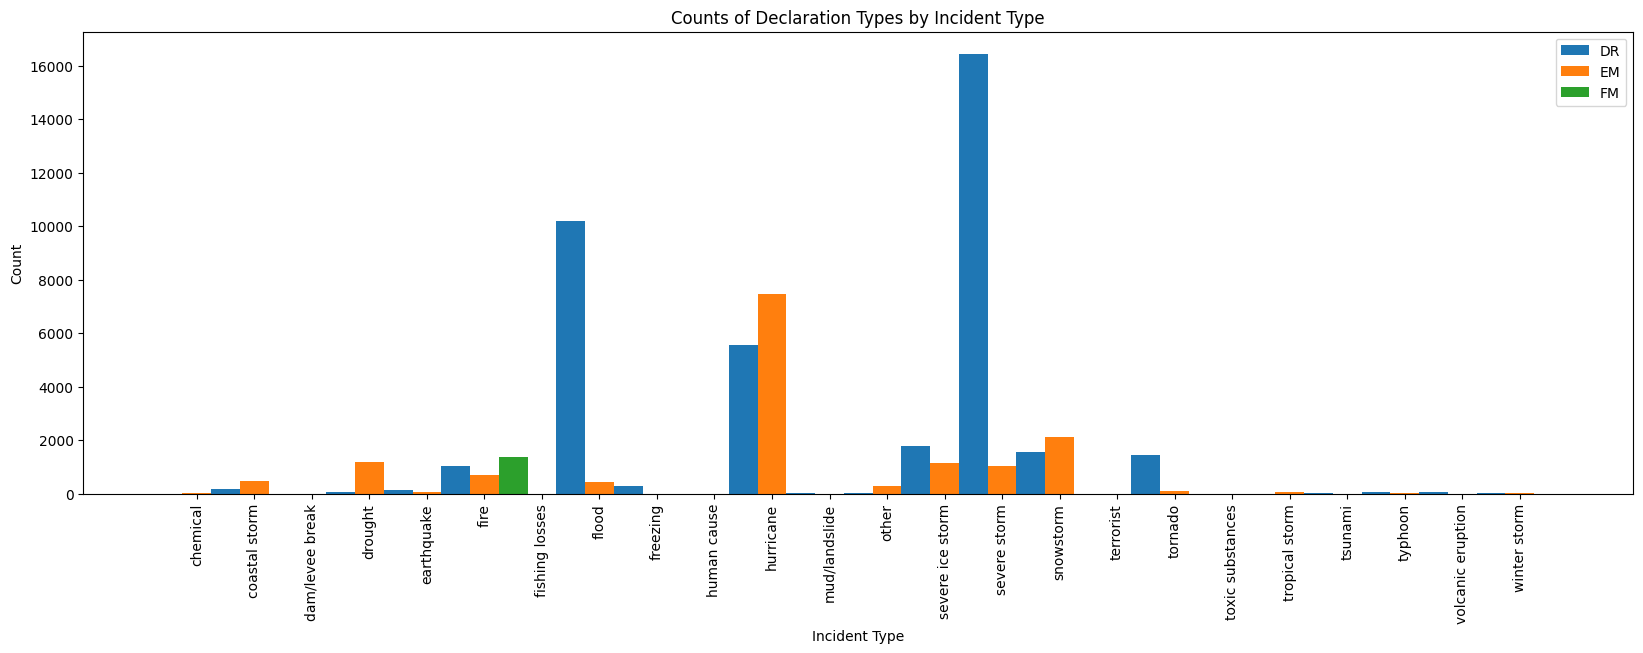

In [ ]:
# Plot all counts in one graph
fig, ax = plt.subplots(figsize=(20, 6))

# Bar width
bar_width = 0.5

# X-axis positions for the bars
x = range(len(result))

# Plot each declaration type
plt.bar(x, result['declaration_type_DR'], width=bar_width, label='DR')
plt.bar([i + bar_width for i in x], result['declaration_type_EM'], width=bar_width, label='EM')
plt.bar([i + 2 * bar_width for i in x], result['declaration_type_FM'], width=bar_width, label='FM')

# X-axis labels (incident types)
plt.xticks([i + bar_width for i in x], result['incident_type'])

# Add labels and legend
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.title('Counts of Declaration Types by Incident Type')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.show()

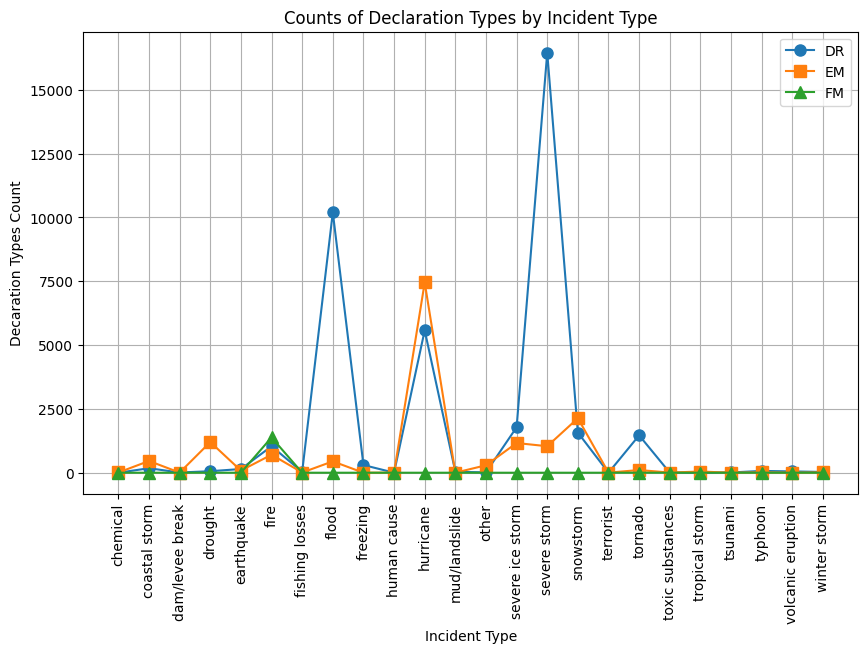

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create lines for declaration_type_DR
plt.plot(x, result['declaration_type_DR'], label='DR', marker='o', linestyle='-', markersize=8)
# Create lines for declaration_type_EM
plt.plot(x, result['declaration_type_EM'], label='EM', marker='s', linestyle='-', markersize=8)
# Create lines for declaration_type_FM
plt.plot(x, result['declaration_type_FM'], label='FM', marker='^', linestyle='-', markersize=8)

# Set x-axis labels
plt.xticks(x, result['incident_type'])

# Add labels and legend
plt.xlabel('Incident Type')
plt.ylabel('Decaration Types Count')
plt.title('Counts of Declaration Types by Incident Type')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.grid()
plt.show()

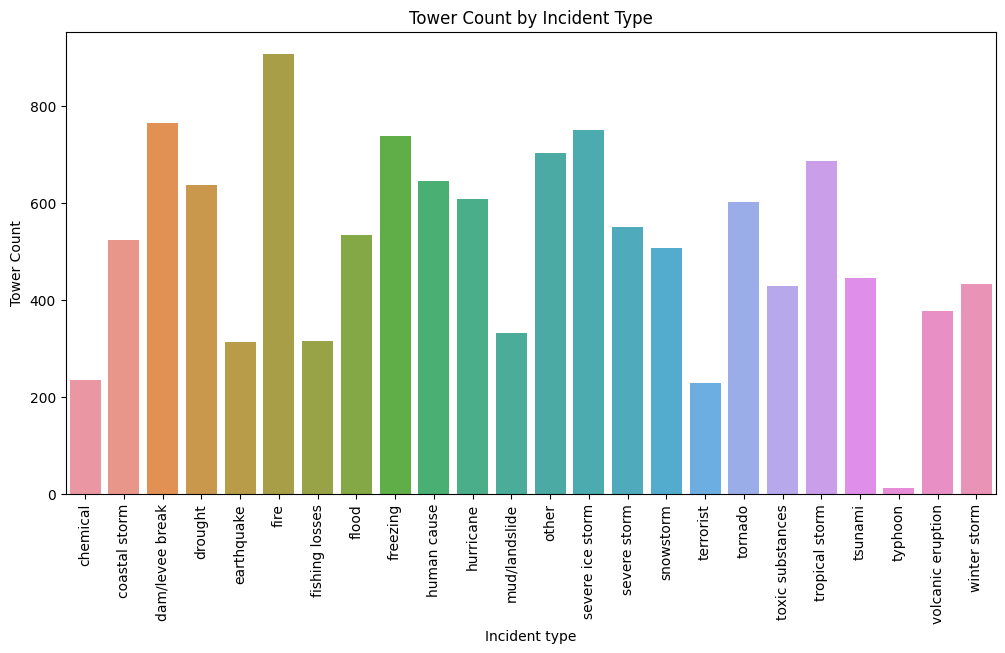

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_tower_count_by_type, x='incident_type', y='tower_count')
plt.xlabel('Incident type')
plt.ylabel('Tower Count')
plt.title('Tower Count by Incident Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
new_disaster.head()

,fema_declaration_string,disaster_number,state,declaration_date,fy_declared,incident_type,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,...,last_refresh,hash,id,start_date,end_date,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,tower_count
0,DR-1-GA,1,GA,1953-05-02T00:00:00Z,1953,tornado,0,1,1,1,...,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02 00:00:00+00:00,1953-05-02 00:00:00+00:00,0 days,1,0,0,632
1,DR-16-GA,16,GA,1954-03-17T00:00:00Z,1954,tornado,0,1,1,1,...,2023-03-18T13:22:03Z,0c3971d707504f1f32089d38a04dd1e3a86e5d0e,5749d536-ce71-4849-9fc3-8c602c7e6afe,1954-03-17 00:00:00+00:00,1954-03-17 00:00:00+00:00,0 days,1,0,0,632
2,DR-110-GA,110,GA,1961-03-02T00:00:00Z,1961,flood,0,1,1,1,...,2023-03-18T13:22:03Z,1cb197433e709f7b06fb700f3629b5b11638242a,875447b8-d3e7-479a-8ce4-bc9d93ce6a1e,1961-03-02 00:00:00+00:00,1961-03-02 00:00:00+00:00,0 days,1,0,0,632
3,DR-150-GA,150,GA,1963-03-26T00:00:00Z,1963,flood,0,1,1,1,...,2023-03-18T13:22:03Z,a91154f35eac0c8ed0bd260c410183f109462ef7,0adc7f59-b4da-44cf-88dd-cc9aab2b3ee8,1963-03-26 00:00:00+00:00,1963-03-26 00:00:00+00:00,0 days,1,0,0,632
4,DR-177-GA,177,GA,1964-09-10T00:00:00Z,1964,hurricane,0,1,1,1,...,2023-03-18T13:22:03Z,d04636dd38874ad9c7bc6716b19bc1ef59617166,c998acad-dce4-4002-a9e9-ecbeed0589aa,1964-09-10 00:00:00+00:00,1964-09-10 00:00:00+00:00,0 days,1,0,0,632


In [ ]:
# Drop unused columns in new_disaster data
new_disaster.drop(columns =["declaration_date", "fema_declaration_string", "disaster_number", "ih_program_declared","fips","declaration_request_number", "place_code",
                            "ia_program_declared", "pa_program_declared", "hm_program_declared", "last_refresh", "hash","id", 'end_date', 'incident_begin_date',
                            'incident_end_date', 'disaster_closeout_date'], inplace=True )

In [ ]:
new_disaster

,state,fy_declared,incident_type,designated_area,start_date,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,tower_count
0,GA,1953,tornado,Statewide,1953-05-02 00:00:00+00:00,0 days,1,0,0,632
1,GA,1954,tornado,Statewide,1954-03-17 00:00:00+00:00,0 days,1,0,0,632
2,GA,1961,flood,Statewide,1961-03-02 00:00:00+00:00,0 days,1,0,0,632
3,GA,1963,flood,Statewide,1963-03-26 00:00:00+00:00,0 days,1,0,0,632
4,GA,1964,hurricane,Statewide,1964-09-10 00:00:00+00:00,0 days,1,0,0,632
...,...,...,...,...,...,...,...,...,...,...
55590,DC,2012,severe storm,District of Columbia (County-equivalent),2012-06-29 00:00:00+00:00,2 days,1,0,0,3
55591,DC,2013,hurricane,District of Columbia (County-equivalent),2012-10-28 00:00:00+00:00,3 days,0,1,0,3
55592,DC,2013,hurricane,District of Columbia (County-equivalent),2012-10-26 00:00:00+00:00,5 days,1,0,0,3
55593,DC,2016,snowstorm,District of Columbia (County-equivalent),2016-01-22 00:00:00+00:00,1 days,1,0,0,3


**Get the year when disasters occur in each area:**

In [ ]:
new_disaster.rename(columns={'fy_declared': 'year'}, inplace=True)
new_disaster['year'] = new_disaster['start_date'].dt.year
new_disaster

,state,year,incident_type,designated_area,start_date,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,tower_count
0,GA,1953,tornado,Statewide,1953-05-02 00:00:00+00:00,0 days,1,0,0,632
1,GA,1954,tornado,Statewide,1954-03-17 00:00:00+00:00,0 days,1,0,0,632
2,GA,1961,flood,Statewide,1961-03-02 00:00:00+00:00,0 days,1,0,0,632
3,GA,1963,flood,Statewide,1963-03-26 00:00:00+00:00,0 days,1,0,0,632
4,GA,1964,hurricane,Statewide,1964-09-10 00:00:00+00:00,0 days,1,0,0,632
...,...,...,...,...,...,...,...,...,...,...
55590,DC,2012,severe storm,District of Columbia (County-equivalent),2012-06-29 00:00:00+00:00,2 days,1,0,0,3
55591,DC,2012,hurricane,District of Columbia (County-equivalent),2012-10-28 00:00:00+00:00,3 days,0,1,0,3
55592,DC,2012,hurricane,District of Columbia (County-equivalent),2012-10-26 00:00:00+00:00,5 days,1,0,0,3
55593,DC,2016,snowstorm,District of Columbia (County-equivalent),2016-01-22 00:00:00+00:00,1 days,1,0,0,3


In [ ]:
new_disaster = new_disaster.drop(columns='start_date')

In [ ]:
new_disaster['incident_type'].unique()

array(['tornado', 'flood', 'hurricane', 'freezing', 'drought',
       'severe storm', 'snowstorm', 'fire', 'severe ice storm',
       'coastal storm', 'other', 'toxic substances', 'dam/levee break',
       'fishing losses', 'terrorist', 'human cause', 'tropical storm',
       'earthquake', 'mud/landslide', 'tsunami', 'winter storm',
       'chemical', 'volcanic eruption', 'typhoon'], dtype=object)

In [ ]:
# One-hot encoding for incident type column
df_encoded1 = pd.get_dummies(new_disaster, columns=['incident_type'], prefix='incident')
df_encoded1

,state,year,designated_area,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,tower_count,incident_chemical,incident_coastal storm,...,incident_severe storm,incident_snowstorm,incident_terrorist,incident_tornado,incident_toxic substances,incident_tropical storm,incident_tsunami,incident_typhoon,incident_volcanic eruption,incident_winter storm
0,GA,1953,Statewide,0 days,1,0,0,632,0,0,...,0,0,0,1,0,0,0,0,0,0
1,GA,1954,Statewide,0 days,1,0,0,632,0,0,...,0,0,0,1,0,0,0,0,0,0
2,GA,1961,Statewide,0 days,1,0,0,632,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GA,1963,Statewide,0 days,1,0,0,632,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GA,1964,Statewide,0 days,1,0,0,632,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55590,DC,2012,District of Columbia (County-equivalent),2 days,1,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0
55591,DC,2012,District of Columbia (County-equivalent),3 days,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
55592,DC,2012,District of Columbia (County-equivalent),5 days,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
55593,DC,2016,District of Columbia (County-equivalent),1 days,1,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
new_disaster.dtypes


state                           object
year                             int64
incident_type                   object
designated_area                 object
duration               timedelta64[ns]
declaration_type_DR              uint8
declaration_type_EM              uint8
declaration_type_FM              uint8
tower_count                      int64
dtype: object

In [ ]:
# Convert timedelta to integer (total seconds)
new_disaster['duration'] = new_disaster['duration'].dt.total_seconds().astype(int)

# Print the DataFrame with the integer duration column

# New celltowers datasets:

In [ ]:
new_celltowers.head()

,address,city,county,state,latitude,longitude
0,"S3, T12N, R10W (101378)",Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806
1,MP 179 Parks Hwy (101380),Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000
2,8751 EAST MILE 6 ROAD (94021),Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194
3,HC01 Box 2547 (101366),Glennallen,VALDEZ-CORDOVA,AK,62.027389,-146.635556
4,65855 Dimond Ridge Road (93995),Homer,KENAI PENINSULA,AK,59.680472,-151.624333


In [ ]:
new_celltowers.drop(columns='address', inplace=True)

In [ ]:
new_celltowers

,city,county,state,latitude,longitude
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806
1,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000
2,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194
3,Glennallen,VALDEZ-CORDOVA,AK,62.027389,-146.635556
4,Homer,KENAI PENINSULA,AK,59.680472,-151.624333
...,...,...,...,...,...
37156,Lame Deer,ROSEBUD,MT,45.622056,-106.665333
37157,GULF OF MEXICO,,GM,29.000806,-89.858944
37158,GULF OF MEXICO,,GM,28.652750,-89.786444
37161,Alamo,SOCORRO,NM,34.417917,-107.497611


In [ ]:
missing_values = new_celltowers.isnull().sum()
print(missing_values)


city         0
county       0
state        0
latitude     0
longitude    0
dtype: int64


In [ ]:
extracell

,X,Y,OBJECTID,UniqSysID,Licensee,Callsign,LocNum,LatDeg,LatMin,LatSec,...,Nepa,QZone,TowReg,SupStruc,AllStruc,StrucType,LicStatus,latdec,londec,url
0,-9.048580e+06,4.669819e+06,1,11497,AT&T Mobility Spectrum LLC,KNKN848,6,38,38,13.5,...,N,,1002593,123.1,125.6,GTOWER,A,38.637083,-81.284778,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
1,-9.085677e+06,4.727033e+06,2,11497,AT&T Mobility Spectrum LLC,KNKN848,7,39,2,14.7,...,N,,0,55.2,59.1,LTOWER,A,39.037417,-81.618028,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
2,-9.026007e+06,4.715856e+06,3,11497,AT&T Mobility Spectrum LLC,KNKN848,18,38,57,33.8,...,N,,1274613,121.9,128.0,LTOWER,A,38.959389,-81.082000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
3,-9.086453e+06,4.673838e+06,4,11497,AT&T Mobility Spectrum LLC,KNKN848,9,38,39,55.0,...,N,,1034261,123.1,125.9,GTOWER,A,38.665278,-81.625000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
4,-9.118736e+06,4.699986e+06,5,11497,AT&T Mobility Spectrum LLC,KNKN848,10,38,50,54.4,...,N,,1219729,80.8,83.8,LTOWER,A,38.848444,-81.915000,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47324,-1.233947e+07,6.196942e+06,47325,3996499,Verizon,WRAQ634,1,48,32,19.2,...,,,1239886,38.1,41.1,LTOWER,A,48.538667,-110.847333,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
47325,-1.023899e+07,3.505414e+06,47326,4056490,Acadiana Cellular General Partnership,WRBT612,1,30,0,52.2,...,,,1271286,76.2,78.6,LTOWER,A,30.014500,-91.978444,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
47326,-1.023899e+07,3.505414e+06,47327,4056490,AT&T Mobility LLC,WRBT612,1,30,0,52.2,...,,,1271286,76.2,78.6,LTOWER,A,30.014500,-91.978444,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...
47327,-1.196658e+07,4.085057e+06,47328,4201632,"Tisdale Telephone Company, LLC",WRED535,1,34,25,4.5,...,,,0,18.3,21.3,MTOWER,A,34.417917,-107.497611,http://wireless2.fcc.gov/UlsApp/UlsSearch/lice...


In [ ]:
filtered_extracell = extracell[["SupStruc", "StrucType", "latdec", "londec"]]
filtered_extracell


,SupStruc,StrucType,latdec,londec
0,123.1,GTOWER,38.637083,-81.284778
1,55.2,LTOWER,39.037417,-81.618028
2,121.9,LTOWER,38.959389,-81.082000
3,123.1,GTOWER,38.665278,-81.625000
4,80.8,LTOWER,38.848444,-81.915000
...,...,...,...,...
47324,38.1,LTOWER,48.538667,-110.847333
47325,76.2,LTOWER,30.014500,-91.978444
47326,76.2,LTOWER,30.014500,-91.978444
47327,18.3,MTOWER,34.417917,-107.497611


In [ ]:
filtered_extracell = filtered_extracell.rename(columns={
    "latdec": "latitude",
    "londec": "longitude"
})

In [ ]:
merged_celltower = pd.merge(new_celltowers, filtered_extracell, on=['latitude', 'longitude'], how='left')


In [ ]:
merged_celltower

,city,county,state,latitude,longitude,SupStruc,StrucType
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER
1,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER
2,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER
3,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER
4,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER
...,...,...,...,...,...,...,...
47331,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,
47332,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,
47333,Alamo,SOCORRO,NM,34.417917,-107.497611,18.3,MTOWER
47334,Alamo,SOCORRO,NM,34.417917,-107.497611,18.3,MTOWER


In [ ]:
null_values = merged_celltower.isnull().sum()
print(null_values)


city          0
county        0
state         0
latitude      0
longitude     0
SupStruc     23
StrucType    23
dtype: int64


In [ ]:
merged_celltowers = merged_celltower.dropna(subset=['SupStruc', 'StrucType'])


In [ ]:
merged_celltowers

,city,county,state,latitude,longitude,SupStruc,StrucType
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER
1,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER
2,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER
3,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER
4,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER
...,...,...,...,...,...,...,...
47330,GULF OF MEXICO,,GM,29.000806,-89.858944,0.0,
47331,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,
47332,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,
47333,Alamo,SOCORRO,NM,34.417917,-107.497611,18.3,MTOWER


In [ ]:
merged_celltowers.to_csv("/content/drive/My Drive/Datasets/Final_celltowers.csv", index=False)

In [ ]:
merged_celltowers['StrucType'].unique()

array(['LTOWER', 'GTOWER', 'MTOWER', 'TOWER', 'BTWR', 'MAST', ' ', 'POLE',
       'B', 'TANK', 'NNTANN', 'RIG', 'BPIPE', 'UPOLE', 'SILO', 'BANT',
       'TREE', 'BMAST', 'BPOLE', 'SIGN', 'PIPE', 'STACK', 'NNGTANN',
       'NNLTANN', 'NTOWER', 'OTHER'], dtype=object)

In [ ]:
merged_celltowers['StrucType'].replace(" ", "OTHER", inplace=True)


<ipython-input-89-f7f52407de7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_celltowers['StrucType'].replace(" ", "OTHER", inplace=True)


In [ ]:
weight_mapping = {
    'Monopole': 1.0,
    'Concealed': 0.6,
    'Lattice': 0.8,
    'Guyed': 0.5,
    'Stealth': 0.7,
    'Flagpole': 0.6,
    'Palm Tree': 0.7,
    'Pine Tree': 0.8,
    'Water Tower': 0.9,
    'Light Pole': 0.6,
    'Additional Stealth': 0.7
}

strucType_to_weight = {
    'LTOWER': weight_mapping['Lattice'],        # Lattice Tower
    'GTOWER': weight_mapping['Guyed'],          # Guyed Tower
    'MTOWER': weight_mapping['Monopole'],       # Monopole Tower
    'TOWER': weight_mapping['Monopole'],        # Generic Tower, guessing Monopole
    'BTWR': weight_mapping['Stealth'],          # Not sure, guessing Stealth type
    'MAST': weight_mapping['Monopole'],         # Generic Mast, guessing Monopole
    'POLE': weight_mapping['Light Pole'],       # Light Pole
    'B': weight_mapping['Concealed'],           # Not sure, guessing Concealed
    'TANK': weight_mapping['Water Tower'],      # Water Tower
    'NNTANN': weight_mapping['Concealed'],      # Not sure, guessing Concealed
    'RIG': weight_mapping['Monopole'],          # Generic Rig, guessing Monopole
    'BPIPE': weight_mapping['Stealth'],         # Not sure, guessing Stealth type
    'UPOLE': weight_mapping['Light Pole'],      # Utility Pole, guessing Light Pole
    'SILO': weight_mapping['Stealth'],          # Silo, guessing Stealth type
    'BANT': weight_mapping['Stealth'],          # Not sure, guessing Stealth type
    'TREE': weight_mapping['Pine Tree'],        # Tree, guessing Pine Tree
    'BMAST': weight_mapping['Monopole'],        # Not sure, guessing Monopole
    'BPOLE': weight_mapping['Flagpole'],        # Not sure, guessing Flagpole
    'SIGN': weight_mapping['Stealth'],          # Sign, guessing Stealth type
    'PIPE': weight_mapping['Stealth'],          # Pipe, guessing Stealth type
    'STACK': weight_mapping['Stealth'],         # Stack, guessing Stealth type
    'NNGTANN': weight_mapping['Concealed'],     # Not sure, guessing Concealed
    'NNLTANN': weight_mapping['Concealed'],     # Not sure, guessing Concealed
    'NTOWER': weight_mapping['Monopole'],       # Not sure, guessing Monopole
    'OTHER': weight_mapping['Additional Stealth'] # Other, guessing Additional Stealth
}

merged_celltowers['Durability_Weight'] = merged_celltowers['StrucType'].map(strucType_to_weight)


<ipython-input-90-664e6ffe09ad>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_celltowers['Durability_Weight'] = merged_celltowers['StrucType'].map(strucType_to_weight)


In [ ]:
merged_celltowers

,city,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
2,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
3,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
4,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
...,...,...,...,...,...,...,...,...
47330,GULF OF MEXICO,,GM,29.000806,-89.858944,0.0,OTHER,0.7
47331,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,OTHER,0.7
47332,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,OTHER,0.7
47333,Alamo,SOCORRO,NM,34.417917,-107.497611,18.3,MTOWER,1.0


In [ ]:
"""
#Using pandas get_dummies to encode 'state'
state_encoded = pd.get_dummies(new_celltowers['state'], prefix='STATE')
new_celltowers = pd.concat([new_celltowers, state_encoded], axis=1)

# Drop the original 'state' column
new_celltowers.drop(columns=['state'], inplace=True)"""


"\n#Using pandas get_dummies to encode 'state'\nstate_encoded = pd.get_dummies(new_celltowers['state'], prefix='STATE')\nnew_celltowers = pd.concat([new_celltowers, state_encoded], axis=1)\n\n# Drop the original 'state' column\nnew_celltowers.drop(columns=['state'], inplace=True)"

In [ ]:
"""
state_name_map = {
    'AK': 'ALASKA',
    'AL': 'ALABAMA',
    'AR': 'ARKANSAS',
    'AZ': 'ARIZONA',
    'CA': 'CALIFORNIA',
    'CO': 'COLORADO',
    'CT': 'CONNECTICUT',
    'DE': 'DELAWARE',
    'FL': 'FLORIDA',
    'GA': 'GEORGIA',
    'HI': 'HAWAII',
    'IA': 'IOWA',
    'ID': 'IDAHO',
    'IL': 'ILLINOIS',
    'IN': 'INDIANA',
    'KS': 'KANSAS',
    'KY': 'KENTUCKY',
    'LA': 'LOUISIANA',
    'MA': 'MASSACHUSETTS',
    'MD': 'MARYLAND',
    'ME': 'MAINE',
    'MI': 'MICHIGAN',
    'MN': 'MINNESOTA',
    'MO': 'MISSOURI',
    'MS': 'MISSISSIPPI',
    'MT': 'MONTANA',
    'NC': 'NORTH CAROLINA',
    'ND': 'NORTH DAKOTA',
    'NE': 'NEBRASKA',
    'NH': 'NEW HAMPSHIRE',
    'NJ': 'NEW JERSEY',
    'NM': 'NEW MEXICO',
    'NV': 'NEVADA',
    'NY': 'NEW YORK',
    'OH': 'OHIO',
    'OK': 'OKLAHOMA',
    'OR': 'OREGON',
    'PA': 'PENNSYLVANIA',
    'RI': 'RHODE ISLAND',
    'SC': 'SOUTH CAROLINA',
    'SD': 'SOUTH DAKOTA',
    'TN': 'TENNESSEE',
    'TX': 'TEXAS',
    'UT': 'UTAH',
    'VA': 'VIRGINIA',
    'VT': 'VERMONT',
    'WA': 'WASHINGTON',
    'WI': 'WISCONSIN',
    'WV': 'WEST VIRGINIA',
    'WY': 'WYOMING',
    # Territories
    'AS': 'AMERICAN SAMOA',
    'DC': 'DISTRICT OF COLUMBIA',
    'FM': 'FEDERATED STATES OF MICRONESIA',
    'GU': 'GUAM',
    'MH': 'MARSHALL ISLANDS',
    'MP': 'NORTHERN MARIANA ISLANDS',
    'PW': 'PALAU',
    'PR': 'PUERTO RICO',
    'VI': 'VIRGIN ISLANDS'
}

"""

"\nstate_name_map = {\n    'AK': 'ALASKA',\n    'AL': 'ALABAMA',\n    'AR': 'ARKANSAS',\n    'AZ': 'ARIZONA',\n    'CA': 'CALIFORNIA',\n    'CO': 'COLORADO',\n    'CT': 'CONNECTICUT',\n    'DE': 'DELAWARE',\n    'FL': 'FLORIDA',\n    'GA': 'GEORGIA',\n    'HI': 'HAWAII',\n    'IA': 'IOWA',\n    'ID': 'IDAHO',\n    'IL': 'ILLINOIS',\n    'IN': 'INDIANA',\n    'KS': 'KANSAS',\n    'KY': 'KENTUCKY',\n    'LA': 'LOUISIANA',\n    'MA': 'MASSACHUSETTS',\n    'MD': 'MARYLAND',\n    'ME': 'MAINE',\n    'MI': 'MICHIGAN',\n    'MN': 'MINNESOTA',\n    'MO': 'MISSOURI',\n    'MS': 'MISSISSIPPI',\n    'MT': 'MONTANA',\n    'NC': 'NORTH CAROLINA',\n    'ND': 'NORTH DAKOTA',\n    'NE': 'NEBRASKA',\n    'NH': 'NEW HAMPSHIRE',\n    'NJ': 'NEW JERSEY',\n    'NM': 'NEW MEXICO',\n    'NV': 'NEVADA',\n    'NY': 'NEW YORK',\n    'OH': 'OHIO',\n    'OK': 'OKLAHOMA',\n    'OR': 'OREGON',\n    'PA': 'PENNSYLVANIA',\n    'RI': 'RHODE ISLAND',\n    'SC': 'SOUTH CAROLINA',\n    'SD': 'SOUTH DAKOTA',\n    'TN': 'T

In [ ]:
"""
# Assuming you've one-hot encoded the 'state' column and the resulting dataframe is named df_encoded
new_column_names = {abbr: "STATE_" + state_name_map[abbr] for abbr in state_name_map}

new_celltowers.rename(columns=new_column_names, inplace=True)"""


'\n# Assuming you\'ve one-hot encoded the \'state\' column and the resulting dataframe is named df_encoded\nnew_column_names = {abbr: "STATE_" + state_name_map[abbr] for abbr in state_name_map}\n\nnew_celltowers.rename(columns=new_column_names, inplace=True)'

In [ ]:
"""
new_celltowers.head()"""

'\nnew_celltowers.head()'

In [ ]:
merged_celltowers['county'].unique()

array(['KENAI PENINSULA', 'MATANUSKA-SUSITNA', 'VALDEZ-CORDOVA', ...,
       'CEIBA', 'YAKUTAT', 'WESTERN'], dtype=object)

In [ ]:
merged_celltowers['county'] = merged_celltowers['county'].str.upper()

<ipython-input-97-01a3da2cbb5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_celltowers['county'] = merged_celltowers['county'].str.upper()


In [ ]:
merged_celltowers

,city,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
2,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
3,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
4,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
...,...,...,...,...,...,...,...,...
47330,GULF OF MEXICO,,GM,29.000806,-89.858944,0.0,OTHER,0.7
47331,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,OTHER,0.7
47332,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,OTHER,0.7
47333,Alamo,SOCORRO,NM,34.417917,-107.497611,18.3,MTOWER,1.0


In [ ]:
merged_celltowers.drop_duplicates(subset=['state', 'county', 'latitude', 'longitude'], inplace=True)
merged_celltowers

<ipython-input-99-ee5ce9382f87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_celltowers.drop_duplicates(subset=['state', 'county', 'latitude', 'longitude'], inplace=True)


,city,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
2,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
4,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
6,Glennallen,VALDEZ-CORDOVA,AK,62.027389,-146.635556,37.5,MTOWER,1.0
8,Homer,KENAI PENINSULA,AK,59.680472,-151.624333,19.2,LTOWER,0.8
...,...,...,...,...,...,...,...,...
47325,Birney,ROSEBUD,MT,45.464583,-106.457500,18.3,MTOWER,1.0
47327,Lame Deer,ROSEBUD,MT,45.622056,-106.665333,16.1,LTOWER,0.8
47329,GULF OF MEXICO,,GM,29.000806,-89.858944,0.0,OTHER,0.7
47331,GULF OF MEXICO,,GM,28.652750,-89.786444,0.0,OTHER,0.7


In [ ]:
merged_celltowers = merged_celltowers.reset_index(drop=True)

In [ ]:
merged_celltowers['county'] = merged_celltowers['county'].replace(" ", np.nan)

In [ ]:
merged_celltowers = merged_celltowers.dropna(subset = 'county')
merged_celltowers

,city,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
2,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
3,Glennallen,VALDEZ-CORDOVA,AK,62.027389,-146.635556,37.5,MTOWER,1.0
4,Homer,KENAI PENINSULA,AK,59.680472,-151.624333,19.2,LTOWER,0.8
...,...,...,...,...,...,...,...,...
22074,LYNN,BOX ELDER,UT,41.830000,-113.768889,52.4,GTOWER,0.5
22075,Busby,BIG HORN,MT,45.534417,-106.968333,60.6,LTOWER,0.8
22076,Birney,ROSEBUD,MT,45.464583,-106.457500,18.3,MTOWER,1.0
22077,Lame Deer,ROSEBUD,MT,45.622056,-106.665333,16.1,LTOWER,0.8


In [ ]:
null_county_rows = null_county_rows.drop(columns='Unnamed: 0')
null_county_rows

,city,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,Kansas,DELAWARE,OK,36.189778,-94.787583,106.6,TOWER,1.0
1,STILWELL,ADAIR,OK,35.822500,-94.617639,57.9,TOWER,1.0
2,BARRIGADA HEIGHTS,NaN,GU,13.489167,144.830278,0.0,OTHER,0.7
3,SOUTHEAST,NaN,GU,13.432222,144.712500,0.0,OTHER,0.7
4,AGANA,NaN,GU,13.650000,144.861944,0.0,OTHER,0.7
...,...,...,...,...,...,...,...,...
196,CORDOVA,VALDEZ-CORDOVA,AK,60.552778,-145.732500,9.8,TOWER,1.0
197,CORDOVA,VALDEZ-CORDOVA,AK,60.524722,-145.695278,3.0,POLE,0.6
198,UNALASKA,ALEUTIANS WEST,AK,53.875806,-166.542444,25.9,OTHER,0.7
199,GULF OF MEXICO,NaN,GM,29.000806,-89.858944,0.0,OTHER,0.7


In [ ]:
merged_celltowers= pd.concat([merged_celltowers, null_county_rows], ignore_index=True).drop_duplicates(keep=False)
merged_celltowers

,city,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,Tyonek,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,Cantwell,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
2,Wasilla,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
3,Glennallen,VALDEZ-CORDOVA,AK,62.027389,-146.635556,37.5,MTOWER,1.0
4,Homer,KENAI PENINSULA,AK,59.680472,-151.624333,19.2,LTOWER,0.8
...,...,...,...,...,...,...,...,...
22076,CORDOVA,VALDEZ-CORDOVA,AK,60.552778,-145.732500,9.8,TOWER,1.0
22077,CORDOVA,VALDEZ-CORDOVA,AK,60.524722,-145.695278,3.0,POLE,0.6
22078,UNALASKA,ALEUTIANS WEST,AK,53.875806,-166.542444,25.9,OTHER,0.7
22079,GULF OF MEXICO,NaN,GM,29.000806,-89.858944,0.0,OTHER,0.7


In [ ]:
merged_celltowers = merged_celltowers.drop(columns='city')
merged_celltowers

,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
2,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
3,VALDEZ-CORDOVA,AK,62.027389,-146.635556,37.5,MTOWER,1.0
4,KENAI PENINSULA,AK,59.680472,-151.624333,19.2,LTOWER,0.8
...,...,...,...,...,...,...,...
22076,VALDEZ-CORDOVA,AK,60.552778,-145.732500,9.8,TOWER,1.0
22077,VALDEZ-CORDOVA,AK,60.524722,-145.695278,3.0,POLE,0.6
22078,ALEUTIANS WEST,AK,53.875806,-166.542444,25.9,OTHER,0.7
22079,NaN,GM,29.000806,-89.858944,0.0,OTHER,0.7


In [ ]:
new_disaster["designated_area"].unique()

array(['Statewide', 'Baker (County)', 'Bleckley (County)', ...,
       'Utah (County)', 'Uintah and Ouray Indian Reservation',
       'District of Columbia (County-equivalent)'], dtype=object)

In [ ]:
new_disaster['designated_area'] = new_disaster['designated_area'].str.replace(r'\s*\(County\)', '').str.upper()


<ipython-input-107-e5571179c96b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_disaster['designated_area'] = new_disaster['designated_area'].str.replace(r'\s*\(County\)', '').str.upper()


In [ ]:
new_disaster["designated_area"].unique()

array(['STATEWIDE', 'BAKER', 'BLECKLEY', ..., 'UTAH',
       'UINTAH AND OURAY INDIAN RESERVATION',
       'DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)'], dtype=object)

In [ ]:
# Get the unique designated areas and counties
designated_areas = set(new_disaster["designated_area"].unique())
counties = set(merged_celltowers['county'].unique())

# Find the designated areas that don't match any county
non_matching_areas = designated_areas - counties

non_matching_areas



{'ACADIA (PARISH)',
 'ADJUNTAS (MUNICIPIO)',
 'AGUADA (MUNICIPIO)',
 'AGUADILLA (MUNICIPIO)',
 'AGUAS BUENAS (MUNICIPIO)',
 'AIBONITO (MUNICIPIO)',
 'ALABAMA AND COUSHATTA INDIAN RESERVATION',
 'ALASKA GATEWAY REGIONAL EDUCATIONAL ATTENDANCE AREA',
 'ALEUTIAN ISLANDS (CENSUS SUBAREA)',
 'ALEUTIANS EAST (BOROUGH)',
 'ALEUTIANS WEST (CENSUS AREA)',
 'ALEXANDRIA',
 'ALLEN (PARISH)',
 'ANASCO (MUNICIPIO)',
 'ANCHORAGE (BOROUGH)',
 'ARECIBO (MUNICIPIO)',
 'ARROYO (MUNICIPIO)',
 'ASCENSION (PARISH)',
 'ASSUMPTION (PARISH)',
 'AVOYELLES (PARISH)',
 'BAD RIVER INDIAN RESERVATION',
 'BARCELONETA (MUNICIPIO)',
 'BARRANQUITAS (MUNICIPIO)',
 'BAYAMON (MUNICIPIO)',
 'BEAUREGARD (PARISH)',
 'BERING STRAIT REGIONAL EDUCATIONAL ATTENDANCE AREA',
 'BETHEL (CENSUS AREA)',
 'BIENVILLE (PARISH)',
 'BIG CYPRESS INDIAN RESERVATION',
 'BLACKFEET INDIAN RESERVATION',
 'BOIS FORTE (NETT LAKE) INDIAN RESERVATION',
 'BON HOMME (TOWNSHIP OF)',
 'BOSSIER (PARISH)',
 'BRIGHTON INDIAN RESERVATION',
 'BRISTOL BAY (BO

# Cleaning non-matching data

**There are many non-matching county data, so they are replaced with cleaned name to match with `merged_celltowers` data:**

In [ ]:
# County Mapping
county_mapping = {
 'ACADIA (PARISH)': 'ACADIA',
 'AGUADILLA (MUNICIPIO)': 'AGUADILLA',
 'ALEUTIANS EAST (BOROUGH)': 'ALEUTIANS EAST',
 'ALEUTIANS WEST (CENSUS AREA)': 'ALEUTIANS EAST',
 'ALLEN (PARISH)': 'ALLEN',
 'ANCHORAGE (BOROUGH)': 'ANCHORAGE',
 'ARECIBO (MUNICIPIO)': 'ARECIBO',
 'ASCENSION (PARISH)': 'ASCENSION',
 'ASSUMPTION (PARISH)': 'ASSUMPTION',
 'AVOYELLES (PARISH)': 'AVOYELLES',
 'BARCELONETA (MUNICIPIO)': '',
 'BARRANQUITAS (MUNICIPIO)': 'BARRANQUITAS',
 'BEAUREGARD (PARISH)': 'BEAUREGARD',
 'BETHEL (CENSUS AREA)': 'BETHEL',
 'BIENVILLE (PARISH)': 'BIENVILLE',
 'BON HOMME (TOWNSHIP OF)': 'BON HOMME',
 'BOSSIER (PARISH)': 'BOSSIER',
 'BRISTOL BAY (BOROUGH)': 'BRISTOL BAY',
 'BRISTOL(IN (P)MSA 1120,1200,2480,5400,6060)': 'BRISTOL',
 'CABO ROJO (MUNICIPIO)': 'CABO ROJO',
 'CADDO (PARISH)': 'CADDO',
 'CALCASIEU (PARISH)': 'CALCASIEU',
 'CALDWELL (PARISH)': 'CALDWELL',
 'CAMERON (PARISH)': 'CAMERON',
 'CAMUY (MUNICIPIO)': 'CAMUY',
 'CANOVANAS (MUNICIPIO)': 'CANOVANAS',
 'CATAHOULA (PARISH)': 'CATAHOULA',
 'CAYEY (MUNICIPIO)': 'CAYEY',
 'CAYUGA NATION (TDSA)': 'CAYUGA',
 'CEIBA (MUNICIPIO)': 'CEIBA',
 'CHARLOTTESVILLE': 'CHARLOTTE',
 'CHESAPEAKE': 'CHESAPEAKE CITY',
 'CIALES (MUNICIPIO)': 'CIALES',
 'CLAIBORNE (PARISH)': 'CLAIBORNE',
 'CONCORDIA (PARISH)': 'CONCORDIA',
 'COOS,LOWER UNQUA AND SIUSLAW INDIAN RESERVATION': 'COOS',
 'CREEK (OTSA)': 'CREEK',
 'CULEBRA (MUNICIPIO)': 'CULEBRA',
 'DE SOTO (PARISH)': 'DE SOTO',
 'DENALI (BOROUGH)': 'DENALI',
 'DILLINGHAM (CENSUS AREA)': 'DILLINGHAM',
 'EAST BATON ROUGE (PARISH)': 'EAST BATON ROUGE',
 'EAST CARROLL (PARISH)': 'EAST CARROLL',
 'EAST FELICIANA (PARISH)': 'EAST FELICIANA',
 'ESSEX(IN PMSA 1120,4160,7090)': 'ESSEX',
 'EVANGELINE (PARISH)': 'EVANGELINE',
 'FAIRBANKS NORTH STAR (BOROUGH)': 'FAIRBANKS NORTH STAR',
 'FAIRFIELD(IN PMSA 1160,1930,5760,8040)': 'FAIRFIELD',
 'FAJARDO (MUNICIPIO)': 'FAJARDO',
 'FLORIDA (MUNICIPIO)': 'FLORIDA',
 'GEORGETOWN - QUITMAN': 'QUITMAN',
 'GRANT (PARISH)': 'GRANT',
 'GUAM (COUNTY-EQUIVALENT)': "",
 'GUAYAMA (MUNICIPIO)': 'GUAYAMA',
 'HAINES (BOROUGH)': 'HAINES',
 'HARTFORD(IN PMSA 1170,3280,5440)': 'HARTFORD',
 'HATILLO (MUNICIPIO)': 'HATILLO',
 'HILLSBOROUGH(IN (P)MSA 4560,4760,5350)': 'HILLSBOROUGH',
 'HUMACAO (MUNICIPIO)': 'HUMACAO',
 'IBERIA (PARISH)': 'IBERIA',
 'IBERVILLE (PARISH)': 'IBERVILLE',
 'ISABELA (MUNICIPIO)': 'ISABELA',
 'JACKSON (PARISH)': 'JACKSON',
 'JAYUYA (MUNICIPIO)': 'JAYUYA',
 'JEFFERSON (PARISH)': 'JEFFERSON',
 'JEFFERSON DAVIS (PARISH)': 'JEFFERSON DAVIS',
 'JUANA DIAZ (MUNICIPIO)': 'JUANA DIAZ',
 'JUNEAU (BOROUGH)': 'JUNEAU',
 'KENAI PENINSULA (BOROUGH)': 'KENAI PENINSULA',
 'KIOWA (TOWNSHIP OF)': 'KIOWA',
 'KODIAK ISLAND (BOROUGH)': 'KODIAK ISLAND',
 'LA SALLE (PARISH)': 'LA SALLE',
 'LAFAYETTE (PARISH)': 'LAFAYETTE',
 'LAFOURCHE (PARISH)': 'LAFOURCHE',
 'LAKE AND PENINSULA (BOROUGH)': 'LAKE AND PENINSULA',
 'LINCOLN (PARISH)': 'LINCOLN',
 'LITCHFIELD(IN (P)MSA 1170,1930,3280,8880)': 'LITCHFIELD',
 'LIVINGSTON (PARISH)': 'LIVINGSTON',
 'MADISON (PARISH)': 'MADISON',
 'MANATI (MUNICIPIO)': 'MANATI',
 'MATANUSKA-SUSITNA (BOROUGH)': 'MATANUSKA-SUSITNA',
 'MAYAGUEZ (MUNICIPIO)': 'MAYAGUEZ',
 'MIDDLESEX(IN (P)MSA 1120,2600,4560)': 'MIDDLESEX',
 'MIDDLESEX(IN (P)MSA 3280,5020,5480)': 'MIDDLESEX',
 'MOREHOUSE (PARISH)': 'MOREHOUSE',
 'NAGUABO (MUNICIPIO)': 'NAGUABO',
 'NARANJITO (MUNICIPIO)': 'NARANJITO',
 'NATCHITOCHES (PARISH)': 'NATCHITOCHES',
 'NAVAJO NATION RESERVATION (ALSO  AZ AND UT)': 'NAVAJO',
 'NAVAJO NATION RESERVATION (ALSO NM AND UT)': 'NAVAJO',
 'NEW HAVEN(IN (P)MSA 1160,5480,8880)': 'NEW HAVEN',
 'NEW LONDON(IN (P)MSA 3280,5520)': 'NEW LONDON',
 'NEWPORT NEWS': 'NEWPORT NEWS CITY',
 'NEWPORT(IN PMSA 2480,6480)': 'NEWPORT',
 'NOME (CENSUS AREA)': 'NOME',
 'NORFOLK(IN PMSA 1120,1200,6060)': 'NORFOLK',
 'NORTH SLOPE (BOROUGH)': 'NORTH SLOPE',
 'NORTHWEST ARCTIC (BOROUGH)': 'NORTHWEST ARCTIC',
 'ORLEANS (PARISH)': 'ORLEANS',
 'OROCOVIS (MUNICIPIO)': 'OROCOVIS',
 'OUACHITA (PARISH)': 'OUACHITA',
 'PAWNEE (OTSA)': 'PAWNEE',
 'PENUELAS (MUNICIPIO)': 'PENUELAS',
 'PETERSBURG (BOROUGH)': 'PETERSBURG',
 'PLAQUEMINES (PARISH)': 'PLAQUEMINES',
 'PLYMOUTH(IN (P)MSA 1120,1200,5400)': 'PLYMOUTH',
 'POINTE COUPEE (PARISH)': 'POINTE COUPEE',
 'PONCE (MUNICIPIO)': 'PONCE',
 'PROVIDENCE(IN PMSA 6060,6480)': 'PROVIDENCE',
 'PUEBLO OF TAOS': 'TAOS',
 'QUEBRADILLAS (MUNICIPIO)': 'QUEBRADILLAS',
 'RAPIDES (PARISH)': 'RAPIDES',
 'RED RIVER (PARISH)': 'RED RIVER',
 'RICHLAND (PARISH)': 'RICHLAND',
 'RINCON (MUNICIPIO)': 'RINCON',
 'RIO GRANDE (MUNICIPIO)': 'RIO GRANDE',
 'ROCKINGHAM(IN (P)MSA 4160,4760,6450)': 'ROCKINGHAM',
 'ROTA (MUNICIPALITY)': 'ROTA',
 'SABINE (PARISH)': 'SABINE',
 'SAIPAN (MUNICIPALITY)': 'SAIPAN',
 'SALINAS (MUNICIPIO)': 'SALINAS',
 'SAN GERMAN (MUNICIPIO)': 'SAN GERMAN',
 'SAN JUAN (MUNICIPIO)': 'SAN JUAN',
 'SAN LORENZO (MUNICIPIO)': 'SAN LORENZO',
 'SAN SEBASTIAN (MUNICIPIO)': 'SAN SEBASTIAN',
 'SANTA ISABEL (MUNICIPIO)': 'SANTA ISABEL',
 'SEMINOLE INDIAN TRUST LANDS': 'SEMINOLE',
 'SKAGWAY (MUNICIPALITY)': 'SKAGWAY',
 'SPOKANE INDIAN RESERVATION': 'SPOKANE',
 'ST. BERNARD (PARISH)': 'ST. BERNARD',
 'ST. CHARLES (PARISH)': 'ST. CHARLES',
 'ST. CROIX (ISLAND) (COUNTY-EQUIVALENT)': 'ST. CROIX',
 'ST. CROIX INDIAN RESERVATION': 'ST. CROIX',
 'ST. HELENA (PARISH)': 'ST. HELENA',
 'ST. JAMES (PARISH)': 'ST. JAMES',
 'ST. JOHN (ISLAND) (COUNTY-EQUIVALENT)': 'ST. JOHN',
 'ST. JOHN THE BAPTIST (PARISH)': 'ST. JOHN THE BAPTIST',
 'ST. LANDRY (PARISH)': 'ST. LANDRY',
 'ST. MARTIN (PARISH)': 'ST. MARTIN',
 'ST. MARY (PARISH)': 'ST. MARY',
 'ST. TAMMANY (PARISH)': 'ST. TAMMANY',
 'ST. THOMAS (ISLAND) (COUNTY-EQUIVALENT)': 'ST. THOMAS',
 'STANDING ROCK SIOUX TRIBE OF NORTH & SOUTH DAKOTA': 'SIOUX',
 'STATEWIDE': 'STATEWIDE',
 'TANGIPAHOA (PARISH)': 'TANGIPAHOA',
 'TENSAS (PARISH)': 'TENSAS',
 'TERREBONNE (PARISH)': 'TERREBONNE',
 'TOA BAJA (MUNICIPIO)': 'TOA BAJA',
 'UMATILLA INDIAN RESERVATION': 'UMATILLA',
 'UNION (PARISH)': 'UNION',
 'UPPER SKAGIT INDIAN RESERVATION': 'SKAGIT',
 'UTUADO (MUNICIPIO)': 'UTUADO',
 'VALDEZ-CORDOVA (CENSUS AREA)': 'VALDEZ-CORDOVA',
 'VERMILION (PARISH)': 'VERMILION',
 'VERNON (PARISH)': 'VERNON',
 'VIEQUES (MUNICIPIO)': 'VIEQUES',
 'VILLALBA (MUNICIPIO)': 'VILLALBA',
 'VIRGINIA BEACH': 'VIRGINIA BEACH CITY',
 'WADE HAMPTON (CENSUS AREA)': 'WADE HAMPTON',
 'WASHINGTON (PARISH)': 'WASHINGTON',
 'WASHINGTON(IN (P)MSA 5520,6480)': 'WASHINGTON',
 'WASHOE INDIAN RESERVATION': 'WASHOE',
 'WEBSTER (PARISH)': 'WEBSTER',
 'WEST BATON ROUGE (PARISH)': 'WEST BATON ROUGE',
 'WEST CARROLL (PARISH)': 'WEST CARROLL',
 'WEST FELICIANA (PARISH)': 'WEST FELICIANA',
 'WESTERN (DISTRICT)': 'WESTERN',
 'WHITE MOUNTAIN APACHE TRIBE': 'APACHE',
 'WINN (PARISH)': 'WINN',
 'WORCESTER (IN (P)MSA 1120,2600,9240)': 'WORCESTER',
 'YABUCOA (MUNICIPIO)': 'YABUCOA',
 'YAUCO (MUNICIPIO)': 'YAUCO',
 'YORK(IN MSA 6400,6450)': 'YORK',
 'YUKON-KOYUKUK (CENSUS AREA)': 'YUKON-KOYUKUK',
 'DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)': 'DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)'
}

In [ ]:
merged_celltowers

,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
2,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
3,VALDEZ-CORDOVA,AK,62.027389,-146.635556,37.5,MTOWER,1.0
4,KENAI PENINSULA,AK,59.680472,-151.624333,19.2,LTOWER,0.8
...,...,...,...,...,...,...,...
22076,VALDEZ-CORDOVA,AK,60.552778,-145.732500,9.8,TOWER,1.0
22077,VALDEZ-CORDOVA,AK,60.524722,-145.695278,3.0,POLE,0.6
22078,ALEUTIANS WEST,AK,53.875806,-166.542444,25.9,OTHER,0.7
22079,NaN,GM,29.000806,-89.858944,0.0,OTHER,0.7


In [ ]:
merged_celltowers[merged_celltowers['state'] == 'FL']['county'].unique() # no parish

array(['LEE', 'PINELLAS', 'ORANGE', 'PASCO', 'OSCEOLA', 'BROWARD',
       'PALM BEACH', 'MIAMI-DADE', 'MONROE', 'ESCAMBIA', 'OKALOOSA',
       'LEVY', 'HENDRY', 'SANTA ROSA', 'WALTON', 'JACKSON', 'HOLMES',
       'WASHINGTON', 'CLAY', 'NASSAU', 'ST. JOHNS', 'SEMINOLE', 'BAKER',
       'BREVARD', 'DUVAL', 'VOLUSIA', 'PUTNAM', 'GLADES', 'DIXIE',
       'INDIAN RIVER', 'OKEECHOBEE', 'TAYLOR', 'SUMTER', 'MARION',
       'CHARLOTTE', 'DESOTO', 'HARDEE', 'ALACHUA', 'HIGHLANDS',
       'BRADFORD', 'LAKE', 'FLAGLER', 'COLUMBIA', 'UNION', 'SUWANNEE',
       'HILLSBOROUGH', 'MANATEE', 'SARASOTA', 'LEON', 'GADSDEN',
       'HAMILTON', 'WAKULLA', 'LIBERTY', 'COLLIER', 'POLK', 'CITRUS',
       'HERNANDO', 'MADISON', 'JEFFERSON', 'ST. LUCIE', 'MARTIN',
       'LAFAYETTE', 'GULF', 'FRANKLIN', 'CALHOUN', 'BAY', 'GILCHRIST',
       nan, 'DADE'], dtype=object)

In [ ]:
new_disaster[new_disaster['state'] == 'FL']['designated_area'].unique()

array(['STATEWIDE', 'BROWARD', 'COLLIER', 'GLADES', 'HENDRY', 'LEE',
       'MARTIN', 'DADE', 'MONROE', 'PALM BEACH', 'ST. LUCIE', 'CHARLOTTE',
       'CITRUS', 'DUVAL', 'HERNANDO', 'HILLSBOROUGH', 'MANATEE', 'MARION',
       'PASCO', 'PINELLAS', 'PUTNAM', 'ST. JOHNS', 'SARASOTA', 'SUMTER',
       'ESCAMBIA', 'OKALOOSA', 'SANTA ROSA', 'BREVARD', 'DIXIE',
       'FRANKLIN', 'LEVY', 'OKEECHOBEE', 'WAKULLA', 'BAKER', 'COLUMBIA',
       'GILCHRIST', 'HAMILTON', 'JEFFERSON', 'LAFAYETTE', 'LEON',
       'MADISON', 'NASSAU', 'SUWANNEE', 'BAY', 'GULF', 'HOLMES', 'WALTON',
       'WASHINGTON', 'DESOTO', 'FLAGLER', 'HARDEE', 'HIGHLANDS',
       'INDIAN RIVER', 'LAKE', 'ORANGE', 'OSCEOLA', 'POLK', 'SEMINOLE',
       'VOLUSIA', 'GADSDEN', 'CALHOUN', 'LIBERTY', 'UNION', 'CLAY',
       'ALACHUA', 'TAYLOR', 'JACKSON', 'BRADFORD', 'MIAMI-DADE',
       'HOLLYWOOD INDIAN RESERVATION', 'BIG CYPRESS INDIAN RESERVATION',
       'BRIGHTON INDIAN RESERVATION', 'FORT PIERCE INDIAN RESERVATION',
       'IMMOKA

**Updating county name for `new_disaster` dataset:**

In [ ]:
new_disaster['designated_area'].replace(county_mapping, inplace=True)

In [ ]:
new_disaster[new_disaster['state'] == 'VA']['designated_area'].unique()

array(['STATEWIDE', 'ALBEMARLE', 'ALLEGHANY', 'AMHERST', 'AUGUSTA',
       'BATH', 'BEDFORD', 'BOTETOURT', 'BUCKINGHAM', 'CAMPBELL',
       'CAROLINE', 'CHESTERFIELD', 'CUMBERLAND', 'ESSEX', 'FLUVANNA',
       'GOOCHLAND', 'HANOVER', 'HENRICO', 'KING AND QUEEN',
       'KING WILLIAM', 'LOUISA', 'NELSON', 'NORTHUMBERLAND', 'POWHATAN',
       'RICHMOND', 'ROCKBRIDGE', 'SPOTSYLVANIA', 'WESTMORELAND',
       'ACCOMACK', 'CLIFTON FORGE', 'AMELIA', 'APPOMATTOX', 'ARLINGTON',
       'CHARLES CITY', 'CHARLOTTE', 'CLARKE', 'CRAIG', 'CULPEPER',
       'FAIRFAX', 'FAUQUIER', 'FLOYD', 'FRANKLIN', 'FREDERICK', 'GILES',
       'GLOUCESTER', 'GREENE', 'SOUTH BOSTON', 'HALIFAX', 'HENRY',
       'ISLE OF WIGHT', 'JAMES CITY', 'KING GEORGE', 'LANCASTER',
       'LOUDOUN', 'MADISON', 'MATHEWS', 'MIDDLESEX', 'MONTGOMERY',
       'NORTHAMPTON', 'NOTTOWAY', 'ORANGE', 'PAGE', 'PITTSYLVANIA',
       'PRINCE EDWARD', 'PRINCE WILLIAM', 'PULASKI', 'RAPPAHANNOCK',
       'ROANOKE', 'ROCKINGHAM', 'SHENANDOAH', 'SM

**Updating county name of state Virginia in `new_disaster` dataset:**

In [ ]:
VA_mapping ={
    'SUFFOLK': 'SUFFOLK CITY', # VA
    'NORFOLK': 'NORFOLK CITY', # VA
    'HAMPTON': 'NORTHAMPTON' # VA
}

# Replace values in the "designated_area" column for the "VA" state
new_disaster.loc[new_disaster['state'] == 'VA', 'designated_area'] = new_disaster.loc[new_disaster['state'] == 'VA', 'designated_area'].replace(VA_mapping)


In [ ]:
new_disaster[new_disaster['state'] == 'VA']['designated_area'].unique()

array(['STATEWIDE', 'ALBEMARLE', 'ALLEGHANY', 'AMHERST', 'AUGUSTA',
       'BATH', 'BEDFORD', 'BOTETOURT', 'BUCKINGHAM', 'CAMPBELL',
       'CAROLINE', 'CHESTERFIELD', 'CUMBERLAND', 'ESSEX', 'FLUVANNA',
       'GOOCHLAND', 'HANOVER', 'HENRICO', 'KING AND QUEEN',
       'KING WILLIAM', 'LOUISA', 'NELSON', 'NORTHUMBERLAND', 'POWHATAN',
       'RICHMOND', 'ROCKBRIDGE', 'SPOTSYLVANIA', 'WESTMORELAND',
       'ACCOMACK', 'CLIFTON FORGE', 'AMELIA', 'APPOMATTOX', 'ARLINGTON',
       'CHARLES CITY', 'CHARLOTTE', 'CLARKE', 'CRAIG', 'CULPEPER',
       'FAIRFAX', 'FAUQUIER', 'FLOYD', 'FRANKLIN', 'FREDERICK', 'GILES',
       'GLOUCESTER', 'GREENE', 'SOUTH BOSTON', 'HALIFAX', 'HENRY',
       'ISLE OF WIGHT', 'JAMES CITY', 'KING GEORGE', 'LANCASTER',
       'LOUDOUN', 'MADISON', 'MATHEWS', 'MIDDLESEX', 'MONTGOMERY',
       'NORTHAMPTON', 'NOTTOWAY', 'ORANGE', 'PAGE', 'PITTSYLVANIA',
       'PRINCE EDWARD', 'PRINCE WILLIAM', 'PULASKI', 'RAPPAHANNOCK',
       'ROANOKE', 'ROCKINGHAM', 'SHENANDOAH', 'SM

**As researched, DC has no county, the county can be called `DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)` or `WASHINGTON`:**

In [ ]:
merged_celltowers[merged_celltowers['state'] == 'DC']

,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
1595,WASHINGTON,DC,38.916472,-76.990583,31.4,TOWER,1.0
20469,WASHINGTON,DC,38.890361,-76.971306,32.6,BANT,0.7
20474,WASHINGTON,DC,38.895861,-76.986250,14.6,BANT,0.7


In [ ]:
merged_celltowers.loc[(merged_celltowers['state'] == 'DC') & (merged_celltowers['county'] == 'WASHINGTON'), 'county'] = 'DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)'

In [ ]:
merged_celltowers[merged_celltowers['state'] == 'DC']['county'].unique()

array(['DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)'], dtype=object)

In [ ]:
new_disaster.shape

(55595, 9)

In [ ]:
merged_celltowers

,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
2,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
3,VALDEZ-CORDOVA,AK,62.027389,-146.635556,37.5,MTOWER,1.0
4,KENAI PENINSULA,AK,59.680472,-151.624333,19.2,LTOWER,0.8
...,...,...,...,...,...,...,...
22076,VALDEZ-CORDOVA,AK,60.552778,-145.732500,9.8,TOWER,1.0
22077,VALDEZ-CORDOVA,AK,60.524722,-145.695278,3.0,POLE,0.6
22078,ALEUTIANS WEST,AK,53.875806,-166.542444,25.9,OTHER,0.7
22079,NaN,GM,29.000806,-89.858944,0.0,OTHER,0.7


In [ ]:
valid_areas = merged_celltowers['county'].unique().tolist()  # Getting unique county names from merged_celltowers
valid_areas.append('STATEWIDE')

filtered_new_disaster = new_disaster[new_disaster['designated_area'].isin(valid_areas)]


In [ ]:
filtered_new_disaster.shape

(53615, 9)

In [ ]:
filtered_new_disaster

,state,year,incident_type,designated_area,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,tower_count
0,GA,1953,tornado,STATEWIDE,0,1,0,0,632
1,GA,1954,tornado,STATEWIDE,0,1,0,0,632
2,GA,1961,flood,STATEWIDE,0,1,0,0,632
3,GA,1963,flood,STATEWIDE,0,1,0,0,632
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,632
...,...,...,...,...,...,...,...,...,...
55590,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,3
55591,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,3
55592,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,3
55593,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,3


In [ ]:
filtered_new_disaster = filtered_new_disaster.drop(columns='tower_count')
filtered_new_disaster

,state,year,incident_type,designated_area,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM
0,GA,1953,tornado,STATEWIDE,0,1,0,0
1,GA,1954,tornado,STATEWIDE,0,1,0,0
2,GA,1961,flood,STATEWIDE,0,1,0,0
3,GA,1963,flood,STATEWIDE,0,1,0,0
4,GA,1964,hurricane,STATEWIDE,0,1,0,0
...,...,...,...,...,...,...,...,...
55590,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0
55591,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0
55592,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0
55593,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0


In [ ]:
designated_areas = set(filtered_new_disaster["designated_area"].unique())
counties = set(merged_celltowers['county'].unique())


non_matching_areas2 = designated_areas - counties

non_matching_areas2


{'STATEWIDE'}

**Getting county area values for each state and county based on `county` dataset. Area unit is in square miles:**

In [ ]:
county.head()

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9


- **`county_areas`:** **Area in each county in each state.**
- **`state_areas`:** **Area in each state.**

In [ ]:
county_areas = county[["state", "name", "area_2010"]] #area in square miles

In [ ]:
county_areas = county_areas.rename(columns={"name": "county", "area_2010" : "area"})

In [ ]:
county_areas

,state,county,area
0,Alabama,Autauga County,594.44
1,Alabama,Baldwin County,1589.78
2,Alabama,Barbour County,884.88
3,Alabama,Bibb County,622.58
4,Alabama,Blount County,644.78
...,...,...,...
3137,Wyoming,Sweetwater County,10426.65
3138,Wyoming,Teton County,3995.38
3139,Wyoming,Uinta County,2081.26
3140,Wyoming,Washakie County,2238.55


In [ ]:
state_areas = county.groupby('state').agg({'area_2010': 'sum'}).reset_index()
state_areas

,state,area_2010
0,Alabama,50645.39
1,Alaska,570640.94
2,Arizona,113594.09
3,Arkansas,52035.48
4,California,155779.21
5,Colorado,103641.93
6,Connecticut,4842.36
7,Delaware,1948.55
8,District of Columbia,61.05
9,Florida,53624.78


**Creating state abbreviation mapping:**

In [ ]:
state_abbrev = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'FLORIDA': 'FL', 'GEORGIA': 'GA',
    'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA',
    'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'MISSOURI': 'MO',
    'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH',
    'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT',
    'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY',
    'DISTRICT OF COLUMBIA': 'DC', 'PUERTO RICO': 'PR', 'GUAM': 'GU', 'U.S. VIRGIN ISLANDS': 'VI',
    'AMERICAN SAMOA': 'AS', 'NORTHERN MARIANA ISLANDS': 'MP', 'GULF OF MEXICO': 'GM'
}



In [ ]:
len(state_abbrev)

57

**Formatting the county name in `county_areas`to match with other datasets:**

In [ ]:
# Convert to uppercase
county_areas['state'] = county_areas['state'].str.upper().str.strip()
state_areas['state'] = state_areas['state'].str.upper().str.strip()

# Replace state names with abbreviations
county_areas['state'] = county_areas['state'].map(state_abbrev)
state_areas['state'] = state_areas['state'].map(state_abbrev)

# Further format `county areas` dataset
county_areas['county'] = county_areas['county'].str.upper().str.strip().str.replace(" COUNTY", "")
county_areas['county'] = county_areas['county'].str.upper().str.strip().str.replace(" PARISH", "")
county_areas['county'] = county_areas['county'].str.upper().str.strip().str.replace(" CENSUS AREA", "")
county_areas['county'] = county_areas['county'].str.upper().str.strip().str.replace(" CITY AND BOROUGH", "")
county_areas['county'] = county_areas['county'].str.upper().str.strip().str.replace(" BOROUGH", "")
county_areas['county'] = county_areas['county'].str.upper().str.strip().str.replace(" MUNICIPALITY", "")

In [ ]:
county_areas['county'] = county_areas['county'].replace('DISTRICT OF COLUMBIA', 'DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)')

In [ ]:
county_areas

,state,county,area
0,AL,AUTAUGA,594.44
1,AL,BALDWIN,1589.78
2,AL,BARBOUR,884.88
3,AL,BIBB,622.58
4,AL,BLOUNT,644.78
...,...,...,...
3137,WY,SWEETWATER,10426.65
3138,WY,TETON,3995.38
3139,WY,UINTA,2081.26
3140,WY,WASHAKIE,2238.55


**These areas are missing in `county` dataset but in `merged_celltowers` dataset:**

In [ ]:
# Add area for missing areas county and state
extra_areas = [
    {'state':'VI', 'county': 'ST. CROIX', 'area': 83.32}, # https://en.wikipedia.org/wiki/Districts_and_sub-districts_of_the_United_States_Virgin_Islands
    {'state': 'VI', 'county': 'ST. JOHN', 'area': 19.69},
    {'state': 'VI', 'county': 'ST. THOMAS', 'area': 31.31},
    {'state': 'AK', 'county': 'SKAGWAY-HOONAH-ANGOON', 'area': 7524.92 + 452.33}, # Total area of Skagway and Hoonah Angoon
    {'state': 'AK', 'county': 'WADE HAMPTON', 'area': 19673}, # total area,  https://en.wikipedia.org/wiki/Kusilvak_Census_Area,_Alaska
    {'state': 'AS', 'county': 'WESTERN', 'area': 28.873}, # https://en.wikipedia.org/wiki/Western_District,_American_Samoa
    {'state': 'MP', 'county': 'ROTA', 'area': 32.87}, # https://en.wikipedia.org/wiki/Rota_(island)
    {'state': 'MP', 'county': 'SAIPAN', 'area': 45.94}, # https://en.wikipedia.org/wiki/Saipan
    {'state': 'SD', 'county': 'SHANNON', 'area': 2097}, # https://en.wikipedia.org/wiki/Oglala_Lakota_County,_South_Dakota
]

extra_areas_df = pd.DataFrame(extra_areas)

In [ ]:
extra_areas_df.shape

(9, 3)

In [ ]:
county_areas = pd.concat([county_areas, extra_areas_df], ignore_index=True)
county_areas

,state,county,area
0,AL,AUTAUGA,594.440
1,AL,BALDWIN,1589.780
2,AL,BARBOUR,884.880
3,AL,BIBB,622.580
4,AL,BLOUNT,644.780
...,...,...,...
3146,AK,WADE HAMPTON,19673.000
3147,AS,WESTERN,28.873
3148,MP,ROTA,32.870
3149,MP,SAIPAN,45.940


In [ ]:
state_areas

,state,area_2010
0,AL,50645.39
1,AK,570640.94
2,AZ,113594.09
3,AR,52035.48
4,CA,155779.21
5,CO,103641.93
6,CT,4842.36
7,DE,1948.55
8,DC,61.05
9,FL,53624.78


**These territories' areas are also missing in `county` dataset but in `merged_celltowers`:**

In [ ]:
 # Territory area --> can quickly find the territory's area dataset to get the tower_density.
 # https://www.census.gov/geographies/reference-files/2010/geo/state-area.html
 # Territory area mapping
territory_mapping = {
    'PR': 5325,
    'GU': 571,
    'VI': 733,
    'AS': 581,
    'MP': 179.2, # https://en.wikipedia.org/wiki/Northern_Mariana_Islands
    'GM': 600000, # https://en.wikipedia.org/wiki/Gulf_of_Mexico
    'UM': 19.02  # https://en.wikipedia.org/wiki/United_States_Minor_Outlying_Islands
}
# Create a DataFrame from territory_mapping
territory_df = pd.DataFrame(list(territory_mapping.items()), columns=['state', 'area_2010'])

# Merge the two DataFrames
state_areas = pd.concat([state_areas, territory_df], ignore_index=True)
state_areas.insert(1, 'county', 'STATEWIDE')
state_areas

,state,county,area_2010
0,AL,STATEWIDE,50645.39
1,AK,STATEWIDE,570640.94
2,AZ,STATEWIDE,113594.09
3,AR,STATEWIDE,52035.48
4,CA,STATEWIDE,155779.21
5,CO,STATEWIDE,103641.93
6,CT,STATEWIDE,4842.36
7,DE,STATEWIDE,1948.55
8,DC,STATEWIDE,61.05
9,FL,STATEWIDE,53624.78


In [ ]:
merged_celltowers

,county,state,latitude,longitude,SupStruc,StrucType,Durability_Weight
0,KENAI PENINSULA,AK,61.164778,-151.043806,50.3,LTOWER,0.8
1,MATANUSKA-SUSITNA,AK,63.094000,-149.507000,70.1,GTOWER,0.5
2,MATANUSKA-SUSITNA,AK,61.680222,-149.231194,30.5,MTOWER,1.0
3,VALDEZ-CORDOVA,AK,62.027389,-146.635556,37.5,MTOWER,1.0
4,KENAI PENINSULA,AK,59.680472,-151.624333,19.2,LTOWER,0.8
...,...,...,...,...,...,...,...
22076,VALDEZ-CORDOVA,AK,60.552778,-145.732500,9.8,TOWER,1.0
22077,VALDEZ-CORDOVA,AK,60.524722,-145.695278,3.0,POLE,0.6
22078,ALEUTIANS WEST,AK,53.875806,-166.542444,25.9,OTHER,0.7
22079,NaN,GM,29.000806,-89.858944,0.0,OTHER,0.7


**Calculating number of towers in each state:**

In [ ]:
# Counting the value of cell towers for each state
tower_state_counts = merged_celltowers['state'].value_counts().reset_index()

# Rename the columns
tower_state_counts.columns = ['state', 'tower_count']

In [ ]:
tower_state_counts

,state,tower_count
0,TX,1527
1,CA,962
2,WI,769
3,NC,758
4,FL,688
5,OH,669
6,MI,668
7,IL,666
8,KY,663
9,MO,658


**Calculating number of towers in each county in each state:**

In [ ]:
# Counting the value of cell towers for each state
tower_counts_county = merged_celltowers.groupby(["state", "county"]).size().reset_index(name='tower_count')

tower_counts_county

,state,county,tower_count
0,AK,ALEUTIANS EAST,7
1,AK,ALEUTIANS WEST,9
2,AK,ANCHORAGE,25
3,AK,BETHEL,34
4,AK,BRISTOL BAY,9
...,...,...,...
3140,WY,SWEETWATER,46
3141,WY,TETON,14
3142,WY,UINTA,23
3143,WY,WASHAKIE,4


In [ ]:
# Compute cell tower statistics by county
county_stats = merged_celltowers.groupby(['state', 'county']).agg({
    'SupStruc': 'mean',
    'Durability_Weight': 'mean',
    'StrucType': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
}).rename(columns={
    'SupStruc': 'avg_SupStruc',
    'Durability_Weight': 'avg_Durability_Weight',
    'StrucType': 'mode_StrucType',
}).reset_index()

# Compute cell tower statistics by state
state_stats = merged_celltowers.groupby('state').agg({
    'SupStruc': 'mean',
    'Durability_Weight': 'mean',
    'StrucType': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
}).rename(columns={
    'SupStruc': 'avg_SupStruc',
    'Durability_Weight': 'avg_Durability_Weight',
    'StrucType': 'mode_StrucType',
}).reset_index()

In [ ]:
state_stats

,state,avg_SupStruc,avg_Durability_Weight,mode_StrucType
0,AK,34.991232,0.851659,LTOWER
1,AL,83.801471,0.808613,TOWER
2,AR,80.222705,0.789372,TOWER
3,AS,30.040000,0.760000,OTHER
4,AZ,62.664948,0.828351,TOWER
5,CA,44.158420,0.809356,OTHER
6,CO,39.194222,0.814000,TOWER
7,CT,50.310909,0.870909,MTOWER
8,DC,26.200000,0.800000,BANT
9,DE,54.926087,0.886957,LTOWER


In [ ]:
filtered_new_disaster

,state,year,incident_type,designated_area,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM
0,GA,1953,tornado,STATEWIDE,0,1,0,0
1,GA,1954,tornado,STATEWIDE,0,1,0,0
2,GA,1961,flood,STATEWIDE,0,1,0,0
3,GA,1963,flood,STATEWIDE,0,1,0,0
4,GA,1964,hurricane,STATEWIDE,0,1,0,0
...,...,...,...,...,...,...,...,...
55590,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0
55591,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0
55592,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0
55593,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0


In [ ]:
county_areas

,state,county,area
0,AL,AUTAUGA,594.440
1,AL,BALDWIN,1589.780
2,AL,BARBOUR,884.880
3,AL,BIBB,622.580
4,AL,BLOUNT,644.780
...,...,...,...
3146,AK,WADE HAMPTON,19673.000
3147,AS,WESTERN,28.873
3148,MP,ROTA,32.870
3149,MP,SAIPAN,45.940


In [ ]:
tower_counts_county

,state,county,tower_count
0,AK,ALEUTIANS EAST,7
1,AK,ALEUTIANS WEST,9
2,AK,ANCHORAGE,25
3,AK,BETHEL,34
4,AK,BRISTOL BAY,9
...,...,...,...
3140,WY,SWEETWATER,46
3141,WY,TETON,14
3142,WY,UINTA,23
3143,WY,WASHAKIE,4


In [ ]:
# Merge county_stats with county_areas to get tower density
county_stats = pd.merge(county_stats, county_areas, how='left', on=['state', 'county'])
county_stats = pd.merge(county_stats, tower_counts_county, how='left', on=['state', 'county'])
county_stats['tower_density'] = county_stats['tower_count'] / county_stats['area']

# Merge state_stats with state_areas to get tower density
state_stats = pd.merge(state_stats, state_areas, how='left', on='state')
state_stats = pd.merge(state_stats, tower_state_counts, how='left', on='state')
state_stats['tower_density'] = state_stats['tower_count'] / state_stats['area_2010']

In [ ]:
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,WY,SWEETWATER,22.980435,0.815217,LTOWER,10426.65,46,0.004412
3141,WY,TETON,22.250000,0.828571,TOWER,3995.38,14,0.003504
3142,WY,UINTA,14.769565,0.839130,TOWER,2081.26,23,0.011051
3143,WY,WASHAKIE,24.675000,0.675000,GTOWER,2238.55,4,0.001787


In [ ]:
state_stats

,state,avg_SupStruc,avg_Durability_Weight,mode_StrucType,county,area_2010,tower_count,tower_density
0,AK,34.991232,0.851659,LTOWER,STATEWIDE,570640.94,422,0.000740
1,AL,83.801471,0.808613,TOWER,STATEWIDE,50645.39,476,0.009399
2,AR,80.222705,0.789372,TOWER,STATEWIDE,52035.48,414,0.007956
3,AS,30.040000,0.760000,OTHER,STATEWIDE,581.00,5,0.008606
4,AZ,62.664948,0.828351,TOWER,STATEWIDE,113594.09,388,0.003416
5,CA,44.158420,0.809356,OTHER,STATEWIDE,155779.21,962,0.006175
6,CO,39.194222,0.814000,TOWER,STATEWIDE,103641.93,450,0.004342
7,CT,50.310909,0.870909,MTOWER,STATEWIDE,4842.36,110,0.022716
8,DC,26.200000,0.800000,BANT,STATEWIDE,61.05,3,0.049140
9,DE,54.926087,0.886957,LTOWER,STATEWIDE,1948.55,46,0.023607


In [ ]:
# Merge the calculated stats with the filtered_disaster dataset
def merge_disaster_stats(row):
    if row['designated_area'] == 'STATEWIDE':
        matched_data = state_stats[state_stats['state'] == row['state']]
    else:
        matched_data = county_stats[(county_stats['state'] == row['state']) & (county_stats['county'] == row['designated_area'])]

    # Ensure you're returning a single row (Series) from the function
    if not matched_data.empty:
        return matched_data.iloc[0]
    else:
        return pd.Series(dtype='float64')


merged_data = filtered_new_disaster.apply(merge_disaster_stats, axis=1)

In [ ]:
merged_data.isnull().sum()

area                      1783
area_2010                53160
avg_Durability_Weight      292
avg_SupStruc               292
county                     292
mode_StrucType             292
state                      292
tower_count                292
tower_density             1328
dtype: int64

In [ ]:
merged_data

,area,area_2010,avg_Durability_Weight,avg_SupStruc,county,mode_StrucType,state,tower_count,tower_density
0,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
1,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
2,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
3,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
4,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
...,...,...,...,...,...,...,...,...,...
55590,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140
55591,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140
55592,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140
55593,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140


# Handling missing data in county_stats dataframe

In [ ]:
# Get any rows (county and state) that have null values.
missing_county_area = county_stats[county_stats['area'].isna()]
missing_county_area

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
9,AK,HOONAH-ANGOON,30.500000,0.800000,LTOWER,NaN,1,NaN
19,AK,PENINSULA AND LAKE,0.000000,0.700000,OTHER,NaN,2,NaN
22,AK,PRINCE OF WALES-OUTER KETCHIKAN,26.425000,0.775000,LTOWER,NaN,4,NaN
27,AK,SOUTHEAST FAIRBANKS,92.400000,0.700000,OTHER,NaN,1,NaN
30,AK,WRANGELL-PETERSBURG,30.355556,0.811111,LTOWER,NaN,9,NaN
336,FL,DADE,47.200000,0.700000,OTHER,NaN,1,NaN
743,IL,LA SALLE,59.984615,0.838462,TOWER,NaN,13,NaN
810,IN,DE KALB,74.342857,0.728571,GTOWER,NaN,7,NaN
839,IN,LA PORTE,69.841176,0.835294,LTOWER,NaN,17,NaN
1139,LA,LA SALLE,136.150000,0.600000,GTOWER,NaN,4,NaN


In [ ]:
# drop missing_county_area in county_stats
county_stats = county_stats.drop(missing_county_area.index)
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,WY,SWEETWATER,22.980435,0.815217,LTOWER,10426.65,46,0.004412
3141,WY,TETON,22.250000,0.828571,TOWER,3995.38,14,0.003504
3142,WY,UINTA,14.769565,0.839130,TOWER,2081.26,23,0.011051
3143,WY,WASHAKIE,24.675000,0.675000,GTOWER,2238.55,4,0.001787


- **County areas are missing due to name issues between 2 dataframes:**
  - **county_stats**
  - **county_areas**
- **Creating county areas mapping to replace county names.**

In [ ]:
county_areas_mapping = {
	'HOONAH-ANGOON': 'HOONAH ANGOON',
	'PENINSULA AND LAKE': 'LAKE AND PENINSULA',
	'PRINCE OF WALES-OUTER KETCHIKAN': 'PRINCE OF WALES-HYDER',
	'WRANGELL-PETERSBURG': 'WRANGELL',
	'DADE': 'MIAMI-DADE',
	'LA SALLE': 'LASALLE',
	'BEDFORD CITY': 'BEDFORD',
	'EMPORIA': 'EMPORIA CITY',
	'SUFFOLK': 'SUFFOLK CITY',
	'VIRGINIA BEACH' : 'VIRGINIA BEACH CITY',
  'DE KALB': 'DEKALB',
  'LA PORTE': 'LAPORTE',
  'SHANNON': 'OGLALA LAKOTA'
}

missing_county_area.loc[:, 'county'] = missing_county_area['county'].replace(county_areas_mapping)
missing_county_area

<ipython-input-160-1a2297d3022f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_county_area.loc[:, 'county'] = missing_county_area['county'].replace(county_areas_mapping)


,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
9,AK,HOONAH ANGOON,30.500000,0.800000,LTOWER,NaN,1,NaN
19,AK,LAKE AND PENINSULA,0.000000,0.700000,OTHER,NaN,2,NaN
22,AK,PRINCE OF WALES-HYDER,26.425000,0.775000,LTOWER,NaN,4,NaN
27,AK,SOUTHEAST FAIRBANKS,92.400000,0.700000,OTHER,NaN,1,NaN
30,AK,WRANGELL,30.355556,0.811111,LTOWER,NaN,9,NaN
336,FL,MIAMI-DADE,47.200000,0.700000,OTHER,NaN,1,NaN
743,IL,LASALLE,59.984615,0.838462,TOWER,NaN,13,NaN
810,IN,DEKALB,74.342857,0.728571,GTOWER,NaN,7,NaN
839,IN,LAPORTE,69.841176,0.835294,LTOWER,NaN,17,NaN
1139,LA,LASALLE,136.150000,0.600000,GTOWER,NaN,4,NaN


In [ ]:
# Concatenate county_stats and missing_county_area
county_stats = pd.concat([county_stats, missing_county_area])

# Reset the index to ensure it's continuous
county_stats.reset_index(drop=True, inplace=True)

county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,NaN,2,NaN
3141,VA,BEDFORD,55.991667,0.816667,OTHER,NaN,12,NaN
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,NaN,1,NaN
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,NaN,1,NaN


In [ ]:
county_stats.isnull().sum()

state                     0
county                    0
avg_SupStruc              0
avg_Durability_Weight     0
mode_StrucType            0
area                     56
tower_count               0
tower_density            56
dtype: int64

In [ ]:
county_stats = pd.merge(county_stats, county_areas, how='left', on=['state', 'county'])

In [ ]:
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_x,tower_count,tower_density,area_y
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003,6981.94
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050,4390.28
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666,1704.68
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838,40570.00
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863,503.84
...,...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,NaN,2,NaN,NaN
3141,VA,BEDFORD,55.991667,0.816667,OTHER,NaN,12,NaN,753.02
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,NaN,1,NaN,6.89
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,NaN,1,NaN,400.17


In [ ]:
county_stats['area_x'].fillna(county_stats['area_y'], inplace=True)
county_stats.drop(columns=['area_y'], inplace=True)
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_x,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,NaN,2,NaN
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,NaN
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,NaN
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,NaN


In [ ]:
county_stats = county_stats.rename(columns={'area_x': 'area'})
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,NaN,2,NaN
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,NaN
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,NaN
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,NaN


In [ ]:
county_stats.isnull().sum()

state                     0
county                    0
avg_SupStruc              0
avg_Durability_Weight     0
mode_StrucType            0
area                     43
tower_count               0
tower_density            56
dtype: int64

**Creating Puerto Rico docs that have parish names and their areas:**

In [ ]:
PR_info

,Name,Title,FIPS code[15],Population (2020)[3],Population (2010)[16],Area[17]
0,Name,Title,FIPS\r\ncode,Population\r\n(2020),Population\r\n(2010),Area
1,Adjuntas,Town,1,"18,020","19,483",66.69 sq mi (172.73 sq km)
2,Aguada,Town,3,"38,136","41,959",30.85 sq mi (79.90 sq km)
3,Aguadilla,City,5,"55,101","60,949",36.53 sq mi (94.61 sq km)
4,Aguas Buenas,Town,7,"24,223","28,659",30.08 sq mi (77.92 sq km)
...,...,...,...,...,...,...
74,Vega Baja,City,145,"54,414","59,662",45.86 sq mi (118.78 sq km)
75,Vieques,Town,147,"8,249","9,301",50.77 sq mi (131.49 sq km)
76,Villalba,Town,149,"22,093","26,073",35.64 sq mi (92.31 sq km)
77,Yabucoa,Town,151,"30,412","37,941",55.21 sq mi (142.99 sq km)


In [ ]:
PR_info = PR_info.drop(0).reset_index(drop=True)
PR_info

,Name,Title,FIPS code[15],Population (2020)[3],Population (2010)[16],Area[17]
0,Adjuntas,Town,1,"18,020","19,483",66.69 sq mi (172.73 sq km)
1,Aguada,Town,3,"38,136","41,959",30.85 sq mi (79.90 sq km)
2,Aguadilla,City,5,"55,101","60,949",36.53 sq mi (94.61 sq km)
3,Aguas Buenas,Town,7,"24,223","28,659",30.08 sq mi (77.92 sq km)
4,Aibonito,Town,9,"24,637","25,900",31.31 sq mi (81.10 sq km)
...,...,...,...,...,...,...
73,Vega Baja,City,145,"54,414","59,662",45.86 sq mi (118.78 sq km)
74,Vieques,Town,147,"8,249","9,301",50.77 sq mi (131.49 sq km)
75,Villalba,Town,149,"22,093","26,073",35.64 sq mi (92.31 sq km)
76,Yabucoa,Town,151,"30,412","37,941",55.21 sq mi (142.99 sq km)


In [ ]:
PR_info['Name'] = PR_info['Name'].str.upper()
PR_info = PR_info.rename(columns={'Name': 'county',
                        'FIPS code[15]': 'FIPS code',
                        'Population (2020)[3]': 'Population (2020)',
                        'Population (2010)[16]': 'Population (2010)',
                        'Area[17]': 'area'})
PR_info

,county,Title,FIPS code,Population (2020),Population (2010),area
0,ADJUNTAS,Town,1,"18,020","19,483",66.69 sq mi (172.73 sq km)
1,AGUADA,Town,3,"38,136","41,959",30.85 sq mi (79.90 sq km)
2,AGUADILLA,City,5,"55,101","60,949",36.53 sq mi (94.61 sq km)
3,AGUAS BUENAS,Town,7,"24,223","28,659",30.08 sq mi (77.92 sq km)
4,AIBONITO,Town,9,"24,637","25,900",31.31 sq mi (81.10 sq km)
...,...,...,...,...,...,...
73,VEGA BAJA,City,145,"54,414","59,662",45.86 sq mi (118.78 sq km)
74,VIEQUES,Town,147,"8,249","9,301",50.77 sq mi (131.49 sq km)
75,VILLALBA,Town,149,"22,093","26,073",35.64 sq mi (92.31 sq km)
76,YABUCOA,Town,151,"30,412","37,941",55.21 sq mi (142.99 sq km)


In [ ]:
PR_info['area'] = PR_info['area'].str.extract(r'([\d.]+)').astype(float) # mile square
PR_info

,county,Title,FIPS code,Population (2020),Population (2010),area
0,ADJUNTAS,Town,1,"18,020","19,483",66.69
1,AGUADA,Town,3,"38,136","41,959",30.85
2,AGUADILLA,City,5,"55,101","60,949",36.53
3,AGUAS BUENAS,Town,7,"24,223","28,659",30.08
4,AIBONITO,Town,9,"24,637","25,900",31.31
...,...,...,...,...,...,...
73,VEGA BAJA,City,145,"54,414","59,662",45.86
74,VIEQUES,Town,147,"8,249","9,301",50.77
75,VILLALBA,Town,149,"22,093","26,073",35.64
76,YABUCOA,Town,151,"30,412","37,941",55.21


**Filling areas of state PR's parish (or counties) in `county_stats` dataset:**

In [ ]:
# Fill NaN area values in county_stats with PR_info based on state and county
# Create a mask for rows with state == 'PR' and area is NaN
mask = (county_stats['state'] == 'PR') & county_stats['area'].isna()

# Use the mask to fill NaN area values with corresponding values from PR_info
county_stats.loc[mask, 'area'] = county_stats.loc[mask].apply(
    lambda row: PR_info.loc[PR_info['county'] == row['county'], 'area'].values[0] if row['county'] in PR_info['county'].values else np.nan, axis=1)

county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,68.19,2,NaN
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,NaN
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,NaN
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,NaN


In [ ]:
county_stats[county_stats['area'].isna()]['county'].unique()

array(['SOUTHEAST FAIRBANKS\xa0'], dtype=object)

In [ ]:
county_stats['county'] = county_stats['county'].str.replace('\xa0', '')
county_stats[county_stats['area'].isna()]['county'].unique()

array(['SOUTHEAST FAIRBANKS'], dtype=object)

In [ ]:
PR_info.insert(0, 'state', 'PR')
PR_info

,state,county,Title,FIPS code,Population (2020),Population (2010),area
0,PR,ADJUNTAS,Town,1,"18,020","19,483",66.69
1,PR,AGUADA,Town,3,"38,136","41,959",30.85
2,PR,AGUADILLA,City,5,"55,101","60,949",36.53
3,PR,AGUAS BUENAS,Town,7,"24,223","28,659",30.08
4,PR,AIBONITO,Town,9,"24,637","25,900",31.31
...,...,...,...,...,...,...,...
73,PR,VEGA BAJA,City,145,"54,414","59,662",45.86
74,PR,VIEQUES,Town,147,"8,249","9,301",50.77
75,PR,VILLALBA,Town,149,"22,093","26,073",35.64
76,PR,YABUCOA,Town,151,"30,412","37,941",55.21


In [ ]:
PR_areas = PR_info[['state', 'county', 'area']]
PR_areas

,state,county,area
0,PR,ADJUNTAS,66.69
1,PR,AGUADA,30.85
2,PR,AGUADILLA,36.53
3,PR,AGUAS BUENAS,30.08
4,PR,AIBONITO,31.31
...,...,...,...
73,PR,VEGA BAJA,45.86
74,PR,VIEQUES,50.77
75,PR,VILLALBA,35.64
76,PR,YABUCOA,55.21


In [ ]:
# Concatenate PR_areas and county_areas vertically (along rows)
county_areas = pd.concat([county_areas, PR_areas], ignore_index=True)

In [ ]:
county_areas

,state,county,area
0,AL,AUTAUGA,594.44
1,AL,BALDWIN,1589.78
2,AL,BARBOUR,884.88
3,AL,BIBB,622.58
4,AL,BLOUNT,644.78
...,...,...,...
3224,PR,VEGA BAJA,45.86
3225,PR,VIEQUES,50.77
3226,PR,VILLALBA,35.64
3227,PR,YABUCOA,55.21


In [ ]:
county_stats[county_stats['area'].isna()]

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
3092,AK,SOUTHEAST FAIRBANKS,92.4,0.7,OTHER,NaN,1,NaN


In [ ]:
county_areas[county_areas['county'] == 'SOUTHEAST FAIRBANKS']

,state,county,area
91,AK,SOUTHEAST FAIRBANKS,24768.81


In [ ]:
county_stats.loc[county_stats['county'] == 'SOUTHEAST FAIRBANKS', 'area'] = 24768.81

In [ ]:
# Update tower_density for county_stats
county_stats['tower_density'] = county_stats['tower_count']/county_stats['area']

# Check if county_stats has null value --> should have no null value at this point.
county_stats.isnull().sum()

state                    0
county                   0
avg_SupStruc             0
avg_Durability_Weight    0
mode_StrucType           0
area                     0
tower_count              0
tower_density            0
dtype: int64

In [ ]:
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,68.19,2,0.029330
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,0.015936
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,0.145138
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,0.002499


# Cleaning merged_data

In [ ]:
merged_data

,area,area_2010,avg_Durability_Weight,avg_SupStruc,county,mode_StrucType,state,tower_count,tower_density
0,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
1,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
2,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
3,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
4,NaN,57513.54,0.768038,81.320253,STATEWIDE,GTOWER,GA,632.0,0.010989
...,...,...,...,...,...,...,...,...,...
55590,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140
55591,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140
55592,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140
55593,61.05,NaN,0.800000,26.200000,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),BANT,DC,3.0,0.049140


In [ ]:
filtered_new_disaster = filtered_new_disaster.rename(columns={'designated_area': 'county'})
filtered_new_disaster

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM
0,GA,1953,tornado,STATEWIDE,0,1,0,0
1,GA,1954,tornado,STATEWIDE,0,1,0,0
2,GA,1961,flood,STATEWIDE,0,1,0,0
3,GA,1963,flood,STATEWIDE,0,1,0,0
4,GA,1964,hurricane,STATEWIDE,0,1,0,0
...,...,...,...,...,...,...,...,...
55590,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0
55591,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0
55592,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0
55593,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0


In [ ]:
merged_data_copy_temp = merged_data.copy()

In [ ]:
# Concatenate the merged data with the original filtered_new_disaster dataset
merged = pd.concat([filtered_new_disaster, merged_data], axis=1)
# For dropping duplicate columns:
merged = merged.loc[:,~merged.columns.duplicated()]
merged_data = merged

In [ ]:
merged_data.isnull().sum()

state                        0
year                         0
incident_type                0
county                       0
duration                     0
declaration_type_DR          0
declaration_type_EM          0
declaration_type_FM          0
area                      1783
area_2010                53160
avg_Durability_Weight      292
avg_SupStruc               292
mode_StrucType             292
tower_count                292
tower_density             1328
dtype: int64

## **Modifying area column names for:**
- merged_data
- state_areas
- state_stats
- county_areas
- county_stats

In [ ]:
merged_data = merged_data.rename(columns={"area_2010": "area_state", "area": "area_county"})

In [ ]:
merged_data_copy = merged_data.copy()
merged_data_copy

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density
0,GA,1953,tornado,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
1,GA,1954,tornado,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
2,GA,1961,flood,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
3,GA,1963,flood,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55590,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.05,NaN,0.800000,26.200000,BANT,3.0,0.049140
55591,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.05,NaN,0.800000,26.200000,BANT,3.0,0.049140
55592,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.05,NaN,0.800000,26.200000,BANT,3.0,0.049140
55593,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.05,NaN,0.800000,26.200000,BANT,3.0,0.049140


In [ ]:
state_areas = state_areas.rename(columns={"area_2010": "area_state"})
state_areas

,state,county,area_state
0,AL,STATEWIDE,50645.39
1,AK,STATEWIDE,570640.94
2,AZ,STATEWIDE,113594.09
3,AR,STATEWIDE,52035.48
4,CA,STATEWIDE,155779.21
5,CO,STATEWIDE,103641.93
6,CT,STATEWIDE,4842.36
7,DE,STATEWIDE,1948.55
8,DC,STATEWIDE,61.05
9,FL,STATEWIDE,53624.78


In [ ]:
state_stats = state_stats.rename(columns={"area_2010": "area_state"})
state_stats

,state,avg_SupStruc,avg_Durability_Weight,mode_StrucType,county,area_state,tower_count,tower_density
0,AK,34.991232,0.851659,LTOWER,STATEWIDE,570640.94,422,0.000740
1,AL,83.801471,0.808613,TOWER,STATEWIDE,50645.39,476,0.009399
2,AR,80.222705,0.789372,TOWER,STATEWIDE,52035.48,414,0.007956
3,AS,30.040000,0.760000,OTHER,STATEWIDE,581.00,5,0.008606
4,AZ,62.664948,0.828351,TOWER,STATEWIDE,113594.09,388,0.003416
5,CA,44.158420,0.809356,OTHER,STATEWIDE,155779.21,962,0.006175
6,CO,39.194222,0.814000,TOWER,STATEWIDE,103641.93,450,0.004342
7,CT,50.310909,0.870909,MTOWER,STATEWIDE,4842.36,110,0.022716
8,DC,26.200000,0.800000,BANT,STATEWIDE,61.05,3,0.049140
9,DE,54.926087,0.886957,LTOWER,STATEWIDE,1948.55,46,0.023607


In [ ]:
county_areas = county_areas.rename(columns={"area": "area_county"})
county_areas

,state,county,area_county
0,AL,AUTAUGA,594.44
1,AL,BALDWIN,1589.78
2,AL,BARBOUR,884.88
3,AL,BIBB,622.58
4,AL,BLOUNT,644.78
...,...,...,...
3224,PR,VEGA BAJA,45.86
3225,PR,VIEQUES,50.77
3226,PR,VILLALBA,35.64
3227,PR,YABUCOA,55.21


In [ ]:
county_stats = county_stats.rename(columns={"area": "area_county"})
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_county,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,68.19,2,0.029330
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,0.015936
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,0.145138
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,0.002499


**Fill missing "area_state" column using state_areas:**

In [ ]:
# Fill missing "area_state" column using state_areas
merged_data_copy['area_state'].fillna(merged_data_copy['state'].map(state_stats.set_index('state')['area_state']), inplace=True)

In [ ]:
merged_data_copy.isnull().sum()

state                       0
year                        0
incident_type               0
county                      0
duration                    0
declaration_type_DR         0
declaration_type_EM         0
declaration_type_FM         0
area_county              1783
area_state                  0
avg_Durability_Weight     292
avg_SupStruc              292
mode_StrucType            292
tower_count               292
tower_density            1328
dtype: int64

In [ ]:
# Update county name 'LA SALLE' of state LA and IL to LASALLE
merged_data_copy.loc[((merged_data_copy['state'] == 'LA') | (merged_data_copy['state'] == 'IL')) & (merged_data_copy['county'] == 'LA SALLE'), 'county'] = 'LASALLE'
merged_data_copy.loc[(merged_data_copy['state'] == 'FL') & (merged_data_copy['county'] == 'DADE'), 'county'] = 'MIAMI-DADE'
merged_data_copy.loc[(merged_data_copy['state'] == 'VA') & (merged_data_copy['county'] == 'EMPORIA'), 'county'] = 'EMPORIA CITY'

- **Update county name for LA, IL: LA SALLE --> LASALLE**
- **Update county name for FL: DADE --> MIAMI-DADE**
- **Update county name for VA: EMPORIA --> EMPORIA CITY**

In [ ]:
merged_data_copy = merged_data_copy.merge(county_stats[['state', 'county', 'area_county']], on=['state', 'county'], how='left', suffixes=('', '_y'))
# Fill NaN values in 'area' with 'area_y' and drop the 'area_y' column
merged_data_copy['area_county'].fillna(merged_data_copy['area_county_y'], inplace=True)
merged_data_copy.drop(columns=['area_county_y'], inplace=True)
merged_data_copy

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density
0,GA,1953,tornado,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
1,GA,1954,tornado,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
2,GA,1961,flood,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
3,GA,1963,flood,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,NaN,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53729,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.05,61.05,0.800000,26.200000,BANT,3.0,0.049140
53730,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.05,61.05,0.800000,26.200000,BANT,3.0,0.049140
53731,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.05,61.05,0.800000,26.200000,BANT,3.0,0.049140
53732,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.05,61.05,0.800000,26.200000,BANT,3.0,0.049140


In [ ]:
merged_data_copy.isnull().sum()

state                       0
year                        0
incident_type               0
county                      0
duration                    0
declaration_type_DR         0
declaration_type_EM         0
declaration_type_FM         0
area_county               735
area_state                  0
avg_Durability_Weight     292
avg_SupStruc              292
mode_StrucType            292
tower_count               292
tower_density            1357
dtype: int64

**These regions do not have any cellular towers information, which should be removed from our dataset:**

In [ ]:
merged_data_copy[merged_data_copy['tower_density'].isnull()]

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density
172,GA,1977,drought,MILLER,0,0,1,0,NaN,57513.54,NaN,NaN,NaN,NaN,NaN
446,GA,1994,tornado,MILLER,1900800,1,0,0,NaN,57513.54,NaN,NaN,NaN,NaN,NaN
620,GA,1998,severe storm,MILLER,7430400,1,0,0,NaN,57513.54,NaN,NaN,NaN,NaN,NaN
742,GA,2004,hurricane,MILLER,3974400,1,0,0,NaN,57513.54,NaN,NaN,NaN,NaN,NaN
926,GA,2005,hurricane,MILLER,3024000,0,1,0,NaN,57513.54,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48421,NE,2011,flood,BOYD,3888000,0,1,0,NaN,76824.22,NaN,NaN,NaN,NaN,NaN
48454,NE,2011,flood,BOYD,5961600,1,0,0,NaN,76824.22,NaN,NaN,NaN,NaN,NaN
48570,NE,2018,snowstorm,BOYD,432000,1,0,0,NaN,76824.22,NaN,NaN,NaN,NaN,NaN
48598,NE,2018,severe storm,BOYD,1209600,1,0,0,NaN,76824.22,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_data_copy = merged_data_copy.dropna(subset=['avg_Durability_Weight',
                                                   'avg_SupStruc',
                                                   'mode_StrucType',
                                                   'tower_count',
                                                   'tower_density'], how='all')
merged_data_copy.isnull().sum()

state                       0
year                        0
incident_type               0
county                      0
duration                    0
declaration_type_DR         0
declaration_type_EM         0
declaration_type_FM         0
area_county               455
area_state                  0
avg_Durability_Weight       0
avg_SupStruc                0
mode_StrucType              0
tower_count                 0
tower_density            1065
dtype: int64

In [ ]:
missing_county_area = merged_data_copy[merged_data_copy['area_county'].isna()]
missing_county_area['county'].unique()

array(['STATEWIDE'], dtype=object)

**Array unique is 'STATEWIDE' which means the area_county is null in only state STATEWIDE. To fill the na value in area_county, it is simply calculated by the average area of counties in a state:**

In [ ]:
# Calculate the average area for each state
state_avg_area = merged_data_copy.groupby('state')['area_county'].transform('mean')

# Fill NaN values in 'area_county' with the calculated average for each state
merged_data_copy['area_county'].fillna(state_avg_area, inplace=True)

merged_data_copy

<ipython-input-203-b147b3931f8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_copy['area_county'].fillna(state_avg_area, inplace=True)


,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53729,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53730,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53731,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53732,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140


In [ ]:
merged_data_copy[merged_data_copy['area_county'].isnull()]

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density
50711,GU,1962,typhoon,STATEWIDE,0,1,0,0,NaN,571.0,0.7,0.0,OTHER,10.0,0.017513
50712,GU,1963,typhoon,STATEWIDE,0,1,0,0,NaN,571.0,0.7,0.0,OTHER,10.0,0.017513
50713,GU,1998,fire,STATEWIDE,0,0,0,1,NaN,571.0,0.7,0.0,OTHER,10.0,0.017513


**In this situation, state GU doesn't have any county in the dataset, so filling the area_county with area_state**

In [ ]:
merged_data_copy.loc[((merged_data_copy['state'] == 'GU')), 'area_county'] = 571.0

In [ ]:
merged_data_copy.isnull().sum()

state                       0
year                        0
incident_type               0
county                      0
duration                    0
declaration_type_DR         0
declaration_type_EM         0
declaration_type_FM         0
area_county                 0
area_state                  0
avg_Durability_Weight       0
avg_SupStruc                0
mode_StrucType              0
tower_count                 0
tower_density            1065
dtype: int64

**At this point, all columns are cleaned. To calculate tower_density, it is:**
- **tower_count/area_state when county = 'STATEWIDE'**
- **tower_count/area_county**

In [ ]:
# Calculate tower_density based on the condition
statewide_mask = merged_data_copy['county'] != 'STATEWIDE'
merged_data_copy.loc[statewide_mask, 'tower_density'] = merged_data_copy[statewide_mask]['tower_count'] / merged_data_copy[statewide_mask]['area_county']
merged_data_copy

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53729,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53730,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53731,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53732,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140


**Merged_data is completely cleaned.**

In [ ]:
merged_data = merged_data_copy
merged_data.isnull().sum()

state                    0
year                     0
incident_type            0
county                   0
duration                 0
declaration_type_DR      0
declaration_type_EM      0
declaration_type_FM      0
area_county              0
area_state               0
avg_Durability_Weight    0
avg_SupStruc             0
mode_StrucType           0
tower_count              0
tower_density            0
dtype: int64

In [ ]:
merged_data.shape

(53442, 15)

**These are areas that don't have any cellular towers information:**

In [ ]:
'''non_celltowers_info = {
    'GA': 'MILLER',
    'TX': 'DALLAS',
    'TX': 'FAYETTE',
    'MT': 'GOLDEN VALLEY',
    'SD': 'JONES',
    'SD': 'SIOUX',
    'NM': 'NAVAJO',
    'IN': 'DEKALB',
    'OK': 'JOHNSTON',
    'VA': 'RICHMOND',
    'VA': 'BUENA VISTA',
    'VA': 'NORTON',
    'VA': 'BRISTOL',
    'VA': 'WILLIAMSBURG',
    'VA': 'SALEM',
    'VA': 'PETERSBURG',
    'VA': 'LEXINGTON',
    'VA': 'COVINGTON',
    'MN': 'RAMSEY',
    'IL': 'SCOTT',
    'NE': 'BOYD'
}'''

"non_celltowers_info = {\n    'GA': 'MILLER',\n    'TX': 'DALLAS',\n    'TX': 'FAYETTE',\n    'MT': 'GOLDEN VALLEY',\n    'SD': 'JONES',\n    'SD': 'SIOUX',\n    'NM': 'NAVAJO',\n    'IN': 'DEKALB',\n    'OK': 'JOHNSTON',\n    'VA': 'RICHMOND',\n    'VA': 'BUENA VISTA',\n    'VA': 'NORTON',\n    'VA': 'BRISTOL',\n    'VA': 'WILLIAMSBURG',\n    'VA': 'SALEM',\n    'VA': 'PETERSBURG',\n    'VA': 'LEXINGTON',\n    'VA': 'COVINGTON',\n    'MN': 'RAMSEY',\n    'IL': 'SCOTT',\n    'NE': 'BOYD'\n}"

# Population Density

In [ ]:
NRI_counties.head()

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALS,WNTW_EALR,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C01001,Alabama,AL,1,Autauga,County,1,1001,58764,...,15.784587,Very Low,2.687716e-07,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023
1,2,C01003,Alabama,AL,1,Baldwin,County,3,1003,231365,...,56.205509,Relatively Moderate,1.268231e-09,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023
2,3,C01005,Alabama,AL,1,Barbour,County,5,1005,25160,...,18.632002,Relatively Low,5.788050e-07,2.347236e-08,7.606598e-07,16.125039,15501.730335,19.535476,Very Low,March 2023
3,4,C01007,Alabama,AL,1,Bibb,County,7,1007,22239,...,13.308573,Very Low,9.014679e-07,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023
4,5,C01009,Alabama,AL,1,Blount,County,9,1009,58992,...,23.645930,Relatively Low,5.268425e-07,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023


In [ ]:
nri_county_pop = NRI_counties[['STATEABBRV', 'COUNTY', 'POPULATION']]
nri_county_pop

,STATEABBRV,COUNTY,POPULATION
0,AL,Autauga,58764
1,AL,Baldwin,231365
2,AL,Barbour,25160
3,AL,Bibb,22239
4,AL,Blount,58992
...,...,...,...
3226,PR,Yabucoa,30397
3227,PR,Yauco,34151
3228,VI,St. Croix,40913
3229,VI,St. John,3882


In [ ]:
nri_county_pop = nri_county_pop.rename(columns={
    'STATEABBRV': 'state',
    'COUNTY': 'county',
    'POPULATION': 'population'
})
nri_county_pop['county'] = nri_county_pop['county'].str.upper()
nri_county_pop

,state,county,population
0,AL,AUTAUGA,58764
1,AL,BALDWIN,231365
2,AL,BARBOUR,25160
3,AL,BIBB,22239
4,AL,BLOUNT,58992
...,...,...,...
3226,PR,YABUCOA,30397
3227,PR,YAUCO,34151
3228,VI,ST. CROIX,40913
3229,VI,ST. JOHN,3882


In [ ]:
county.head()

,fips,state,name,pop2000,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,...,poverty_under_18_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,uninsured_65_and_older_2019,uninsured_under_19_2019,uninsured_under_6_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,1001,Alabama,Autauga County,43671.0,54571,55199.0,54927.0,54695.0,54864.0,54838.0,...,23.2,2.2,3.5,7.1,0.0,1.7,1.7,12.6,76.8,74.6
1,1003,Alabama,Baldwin County,140415.0,182265,186534.0,190048.0,194736.0,199064.0,202863.0,...,13.4,1.7,4.0,8.9,0.3,3.8,2.2,11.8,86.2,83.1
2,1005,Alabama,Barbour County,29038.0,27457,27351.0,27175.0,26947.0,26749.0,26264.0,...,50.1,1.2,9.4,11.3,0.3,3.3,3.4,6.6,46.8,45.8
3,1007,Alabama,Bibb County,20826.0,22915,22745.0,22658.0,22503.0,22533.0,22561.0,...,NaN,0.6,7.0,10.7,0.0,2.0,4.5,8.0,76.8,74.5
4,1009,Alabama,Blount County,51024.0,57322,57562.0,57595.0,57623.0,57546.0,57590.0,...,18.4,1.6,3.1,10.8,0.2,5.9,6.1,7.7,95.5,86.9


In [ ]:
county_pop = county[["state", "name", "pop_2019"]]
county_pop = county_pop.rename(columns={"name": "county", "pop_2019" : "population"})

In [ ]:
county_pop

,state,county,population
0,Alabama,Autauga County,55380
1,Alabama,Baldwin County,212830
2,Alabama,Barbour County,25361
3,Alabama,Bibb County,22493
4,Alabama,Blount County,57681
...,...,...,...
3137,Wyoming,Sweetwater County,43521
3138,Wyoming,Teton County,23280
3139,Wyoming,Uinta County,20479
3140,Wyoming,Washakie County,8027


In [ ]:
county_areas

,state,county,area_county
0,AL,AUTAUGA,594.44
1,AL,BALDWIN,1589.78
2,AL,BARBOUR,884.88
3,AL,BIBB,622.58
4,AL,BLOUNT,644.78
...,...,...,...
3224,PR,VEGA BAJA,45.86
3225,PR,VIEQUES,50.77
3226,PR,VILLALBA,35.64
3227,PR,YABUCOA,55.21


**Add population column to `county_areas` using `county_pop`:**

In [ ]:
county_areas_copy = county_areas.copy()
county_areas_copy['population'] = county_pop['population']
county_pop = county_areas_copy
county_pop

,state,county,area_county,population
0,AL,AUTAUGA,594.44,55380.0
1,AL,BALDWIN,1589.78,212830.0
2,AL,BARBOUR,884.88,25361.0
3,AL,BIBB,622.58,22493.0
4,AL,BLOUNT,644.78,57681.0
...,...,...,...,...
3224,PR,VEGA BAJA,45.86,NaN
3225,PR,VIEQUES,50.77,NaN
3226,PR,VILLALBA,35.64,NaN
3227,PR,YABUCOA,55.21,NaN


**Getting areas that don't have population information:**

In [ ]:
missing_county_pop = county_pop[county_pop['population'].isnull()]
missing_county_pop

,state,county,area_county,population
3142,VI,ST. CROIX,83.32,NaN
3143,VI,ST. JOHN,19.69,NaN
3144,VI,ST. THOMAS,31.31,NaN
3145,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN
3146,AK,WADE HAMPTON,19673.00,NaN
...,...,...,...,...
3224,PR,VEGA BAJA,45.86,NaN
3225,PR,VIEQUES,50.77,NaN
3226,PR,VILLALBA,35.64,NaN
3227,PR,YABUCOA,55.21,NaN


**Fill null population using `nri_county_pop` dataset:**

In [ ]:
missing_county_pop = missing_county_pop.merge(nri_county_pop[['state', 'county', 'population']], on=['state', 'county'], how='left')
missing_county_pop.drop(columns='population_x', inplace=True)
missing_county_pop = missing_county_pop.rename(columns={'population_y' : 'population'})
missing_county_pop

,state,county,area_county,population
0,VI,ST. CROIX,83.32,40913.0
1,VI,ST. JOHN,19.69,3882.0
2,VI,ST. THOMAS,31.31,41412.0
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN
4,AK,WADE HAMPTON,19673.00,NaN
...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0
83,PR,VIEQUES,50.77,8188.0
84,PR,VILLALBA,35.64,22060.0
85,PR,YABUCOA,55.21,30397.0


**Some areas still needs population values:**

In [ ]:
missing_county_pop[missing_county_pop['population'].isnull()]

,state,county,area_county,population
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN
4,AK,WADE HAMPTON,19673.00,NaN
8,SD,SHANNON,2097.00,NaN
14,PR,ANASCO,39.29,NaN
19,PR,BAYAMON,44.32,NaN
23,PR,CANOVANAS,32.87,NaN
25,PR,CATANO,4.84,NaN
31,PR,COMERIO,28.40,NaN
37,PR,GUANICA,37.05,NaN
47,PR,JUANA DIAZ,60.28,NaN


**As can be seen, the PR state population needs to be filled out by using `PR_info` dataset:**

In [ ]:
PR_pop = PR_info[['state', 'county', 'Population (2020)']]
PR_pop = PR_pop.rename(columns={"Population (2020)": 'population'})
PR_pop

,state,county,population
0,PR,ADJUNTAS,"18,020"
1,PR,AGUADA,"38,136"
2,PR,AGUADILLA,"55,101"
3,PR,AGUAS BUENAS,"24,223"
4,PR,AIBONITO,"24,637"
...,...,...,...
73,PR,VEGA BAJA,"54,414"
74,PR,VIEQUES,"8,249"
75,PR,VILLALBA,"22,093"
76,PR,YABUCOA,"30,412"


In [ ]:
PR_pop_miss = missing_county_pop.merge(PR_pop, on=['state', 'county'], how='left')
PR_pop_miss

,state,county,area_county,population_x,population_y
0,VI,ST. CROIX,83.32,40913.0,NaN
1,VI,ST. JOHN,19.69,3882.0,NaN
2,VI,ST. THOMAS,31.31,41412.0,NaN
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN,NaN
4,AK,WADE HAMPTON,19673.00,NaN,NaN
...,...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0,"54,414"
83,PR,VIEQUES,50.77,8188.0,"8,249"
84,PR,VILLALBA,35.64,22060.0,"22,093"
85,PR,YABUCOA,55.21,30397.0,"30,412"


In [ ]:
# Create a mask for rows where 'population_x' is null
mask = PR_pop_miss['population_x'].isnull()

# Update 'population_x' with the corresponding values from 'population_y' for the rows where 'population_x' is null
PR_pop_miss.loc[mask, 'population_x'] = PR_pop_miss.loc[mask, 'population_y']

PR_pop_miss

,state,county,area_county,population_x,population_y
0,VI,ST. CROIX,83.32,40913.0,NaN
1,VI,ST. JOHN,19.69,3882.0,NaN
2,VI,ST. THOMAS,31.31,41412.0,NaN
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN,NaN
4,AK,WADE HAMPTON,19673.00,NaN,NaN
...,...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0,"54,414"
83,PR,VIEQUES,50.77,8188.0,"8,249"
84,PR,VILLALBA,35.64,22060.0,"22,093"
85,PR,YABUCOA,55.21,30397.0,"30,412"


In [ ]:
PR_pop_miss.isnull().sum()

state           0
county          0
area_county     0
population_x    3
population_y    9
dtype: int64

In [ ]:
PR_pop_miss.drop(columns='population_y', inplace=True)
PR_pop_miss

,state,county,area_county,population_x
0,VI,ST. CROIX,83.32,40913.0
1,VI,ST. JOHN,19.69,3882.0
2,VI,ST. THOMAS,31.31,41412.0
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN
4,AK,WADE HAMPTON,19673.00,NaN
...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0
83,PR,VIEQUES,50.77,8188.0
84,PR,VILLALBA,35.64,22060.0
85,PR,YABUCOA,55.21,30397.0


In [ ]:
PR_pop_miss = PR_pop_miss.rename(columns={'population_x': 'population'})
PR_pop_miss

,state,county,area_county,population
0,VI,ST. CROIX,83.32,40913.0
1,VI,ST. JOHN,19.69,3882.0
2,VI,ST. THOMAS,31.31,41412.0
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN
4,AK,WADE HAMPTON,19673.00,NaN
...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0
83,PR,VIEQUES,50.77,8188.0
84,PR,VILLALBA,35.64,22060.0
85,PR,YABUCOA,55.21,30397.0


In [ ]:
PR_pop_miss.isnull().sum()

state          0
county         0
area_county    0
population     3
dtype: int64

**`missing_county_pop` has 87 rows with null population earlir, right now, there're still 3 left:**

In [ ]:
missing_county_pop = PR_pop_miss
missing_county_pop

,state,county,area_county,population
0,VI,ST. CROIX,83.32,40913.0
1,VI,ST. JOHN,19.69,3882.0
2,VI,ST. THOMAS,31.31,41412.0
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN
4,AK,WADE HAMPTON,19673.00,NaN
...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0
83,PR,VIEQUES,50.77,8188.0
84,PR,VILLALBA,35.64,22060.0
85,PR,YABUCOA,55.21,30397.0


In [ ]:
missing_county_pop[missing_county_pop['population'].isnull()]

,state,county,area_county,population
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN
4,AK,WADE HAMPTON,19673.00,NaN
8,SD,SHANNON,2097.00,NaN


In [ ]:
pop_filling =[
    {'state': 'AK', 'county': 'SKAGWAY-HOONAH-ANGOON', 'population': 2313+1238}, # HOONAH-ANGOON + SKAGWAY
    {'state': 'AK', 'county': 'WADE HAMPTON', 'population':8384},
    {'state': 'SD', 'county': 'SHANNON', 'population': 14335},
]

pop_filling_df = pd.DataFrame(pop_filling)

In [ ]:
pop_filling_df

,state,county,population
0,AK,SKAGWAY-HOONAH-ANGOON,3551
1,AK,WADE HAMPTON,8384
2,SD,SHANNON,14335


In [ ]:
missing_county_pop = missing_county_pop.merge(pop_filling_df, on=['state', 'county'], how='left')
missing_county_pop

,state,county,area_county,population_x,population_y
0,VI,ST. CROIX,83.32,40913.0,NaN
1,VI,ST. JOHN,19.69,3882.0,NaN
2,VI,ST. THOMAS,31.31,41412.0,NaN
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,NaN,3551.0
4,AK,WADE HAMPTON,19673.00,NaN,8384.0
...,...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0,NaN
83,PR,VIEQUES,50.77,8188.0,NaN
84,PR,VILLALBA,35.64,22060.0,NaN
85,PR,YABUCOA,55.21,30397.0,NaN


In [ ]:
# Create a mask for rows where 'population_x' is null
mask = missing_county_pop['population_x'].isnull()

# Update 'population_x' with the corresponding values from 'population_y' for the rows where 'population_x' is null
missing_county_pop.loc[mask, 'population_x'] = missing_county_pop.loc[mask, 'population_y']

missing_county_pop.drop(columns='population_y', inplace=True)
missing_county_pop = missing_county_pop.rename(columns={'population_x': 'population'})
missing_county_pop

,state,county,area_county,population
0,VI,ST. CROIX,83.32,40913.0
1,VI,ST. JOHN,19.69,3882.0
2,VI,ST. THOMAS,31.31,41412.0
3,AK,SKAGWAY-HOONAH-ANGOON,7977.25,3551.0
4,AK,WADE HAMPTON,19673.00,8384.0
...,...,...,...,...
82,PR,VEGA BAJA,45.86,54334.0
83,PR,VIEQUES,50.77,8188.0
84,PR,VILLALBA,35.64,22060.0
85,PR,YABUCOA,55.21,30397.0


In [ ]:
missing_county_pop.isnull().sum()

state          0
county         0
area_county    0
population     0
dtype: int64

**We've filled out all missing value, merging `missing_county_pop` to `county_pop`:**

In [ ]:
county_pop

,state,county,area_county,population
0,AL,AUTAUGA,594.44,55380.0
1,AL,BALDWIN,1589.78,212830.0
2,AL,BARBOUR,884.88,25361.0
3,AL,BIBB,622.58,22493.0
4,AL,BLOUNT,644.78,57681.0
...,...,...,...,...
3224,PR,VEGA BAJA,45.86,NaN
3225,PR,VIEQUES,50.77,NaN
3226,PR,VILLALBA,35.64,NaN
3227,PR,YABUCOA,55.21,NaN


In [ ]:
county_pop = county_pop.merge(missing_county_pop, on=['state', 'county'], how='left')
# Create a mask for rows where 'population_x' is null
mask = county_pop['population_x'].isnull()

# Update 'population_x' with the corresponding values from 'population_y' for the rows where 'population_x' is null
county_pop.loc[mask, 'population_x'] = county_pop.loc[mask, 'population_y']

county_pop.drop(columns='population_y', inplace=True)
county_pop = county_pop.rename(columns={'population_x': 'population'})
county_pop

,state,county,area_county_x,population,area_county_y
0,AL,AUTAUGA,594.44,55380.0,NaN
1,AL,BALDWIN,1589.78,212830.0,NaN
2,AL,BARBOUR,884.88,25361.0,NaN
3,AL,BIBB,622.58,22493.0,NaN
4,AL,BLOUNT,644.78,57681.0,NaN
...,...,...,...,...,...
3224,PR,VEGA BAJA,45.86,54334.0,45.86
3225,PR,VIEQUES,50.77,8188.0,50.77
3226,PR,VILLALBA,35.64,22060.0,35.64
3227,PR,YABUCOA,55.21,30397.0,55.21


In [ ]:
county_pop.drop(columns='area_county_y', inplace=True)

In [ ]:
county_pop = county_pop.rename(columns={'area_county_x': 'area_county'})

In [ ]:
county_pop

,state,county,area_county,population
0,AL,AUTAUGA,594.44,55380.0
1,AL,BALDWIN,1589.78,212830.0
2,AL,BARBOUR,884.88,25361.0
3,AL,BIBB,622.58,22493.0
4,AL,BLOUNT,644.78,57681.0
...,...,...,...,...
3224,PR,VEGA BAJA,45.86,54334.0
3225,PR,VIEQUES,50.77,8188.0
3226,PR,VILLALBA,35.64,22060.0
3227,PR,YABUCOA,55.21,30397.0


In [ ]:
county_pop.isnull().sum()

state          0
county         0
area_county    0
population     0
dtype: int64

**At this point, county_pop is ready to use.**

## Completed `county_stats`:

In [ ]:
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_county,tower_count,tower_density
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863
...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,68.19,2,0.029330
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,0.015936
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,0.145138
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,0.002499


In [ ]:
county_info = county_stats.merge(county_pop, on=['state', 'county'], how='left')
county_info.isnull().sum()

state                    0
county                   0
avg_SupStruc             0
avg_Durability_Weight    0
mode_StrucType           0
area_county_x            0
tower_count              0
tower_density            0
area_county_y            0
population               0
dtype: int64

In [ ]:
county_info.drop(columns='area_county_y', inplace=True)
county_info = county_info.rename(columns={'area_county_x': 'area_county'})
county_info

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_county,tower_count,tower_density,population
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003,3385.0
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050,5698.0
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666,293531.0
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838,18134.0
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863,875.0
...,...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,68.19,2,0.029330,34151.0
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,0.015936,78376.0
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,0.145138,5442.0
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,0.002499,90093.0


In [ ]:
county_stats = county_info.copy()
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_county,tower_count,tower_density,population
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003,3385.0
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050,5698.0
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666,293531.0
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838,18134.0
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863,875.0
...,...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,68.19,2,0.029330,34151.0
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,0.015936,78376.0
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,0.145138,5442.0
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,0.002499,90093.0


**There're rows that have `,` in `population` values:**

In [ ]:
rows_with_comma = county_stats[county_stats['population'].str.contains(',', regex=False, na=False)]
rows_with_comma

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_county,tower_count,tower_density,population
3104,PR,CANOVANAS,76.200000,0.800000,LTOWER,32.87,1,0.030423,"42,337"
3111,PR,GUANICA,0.000000,0.700000,OTHER,37.05,1,0.026991,"13,787"
3117,PR,JUANA DIAZ,43.450000,0.750000,LTOWER,60.28,2,0.033179,"46,538"
3119,PR,MANATI,48.500000,1.000000,MTOWER,46.13,1,0.021678,"39,492"
3120,PR,MAYAGUEZ,6.700000,0.650000,B,77.65,2,0.025757,"73,077"
3124,PR,PENUELAS,38.250000,0.750000,LTOWER,44.62,2,0.044823,"20,399"
3127,PR,RINCON,58.933333,0.766667,LTOWER,14.29,3,0.209937,"15,187"
3128,PR,RIO GRANDE,45.250000,0.750000,LTOWER,60.62,2,0.032992,"47,060"
3130,PR,SAN GERMAN,46.300000,0.750000,LTOWER,54.50,2,0.036697,"31,879"
3133,PR,SAN SEBASTIAN,19.050000,0.850000,MTOWER,70.42,2,0.028401,"39,345"


**Remove `,` in theses rows:**

In [ ]:
county_stats.loc[rows_with_comma.index, 'population'] = rows_with_comma['population'].str.replace(',', '')

In [ ]:
rows_with_comma = county_stats[county_stats['population'].str.contains(',', regex=False, na=False)]
rows_with_comma

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_county,tower_count,tower_density,population


In [ ]:
county_stats['population'] = county_stats['population'].astype(float)
county_stats['pop_dens'] = county_stats['population']/county_stats['area_county']
county_stats.isnull().sum()

state                    0
county                   0
avg_SupStruc             0
avg_Durability_Weight    0
mode_StrucType           0
area_county              0
tower_count              0
tower_density            0
population               0
pop_dens                 0
dtype: int64

In [ ]:
county_stats

,state,county,avg_SupStruc,avg_Durability_Weight,mode_StrucType,area_county,tower_count,tower_density,population,pop_dens
0,AK,ALEUTIANS EAST,22.028571,0.857143,TOWER,6981.94,7,0.001003,3385.0,0.484822
1,AK,ALEUTIANS WEST,21.811111,0.922222,TOWER,4390.28,9,0.002050,5698.0,1.297867
2,AK,ANCHORAGE,29.252000,0.888000,LTOWER,1704.68,25,0.014666,293531.0,172.191262
3,AK,BETHEL,30.952941,0.929412,TOWER,40570.00,34,0.000838,18134.0,0.446981
4,AK,BRISTOL BAY,19.155556,0.933333,TOWER,503.84,9,0.017863,875.0,1.736662
...,...,...,...,...,...,...,...,...,...,...
3140,PR,YAUCO,27.450000,0.750000,LTOWER,68.19,2,0.029330,34151.0,500.821235
3141,VA,BEDFORD,55.991667,0.816667,OTHER,753.02,12,0.015936,78376.0,104.082229
3142,VA,EMPORIA CITY,0.000000,0.700000,OTHER,6.89,1,0.145138,5442.0,789.840348
3143,VA,SUFFOLK CITY,59.400000,0.700000,OTHER,400.17,1,0.002499,90093.0,225.136817


## Complete `state_stats`:

In [ ]:
state_stats

,state,avg_SupStruc,avg_Durability_Weight,mode_StrucType,county,area_state,tower_count,tower_density
0,AK,34.991232,0.851659,LTOWER,STATEWIDE,570640.94,422,0.000740
1,AL,83.801471,0.808613,TOWER,STATEWIDE,50645.39,476,0.009399
2,AR,80.222705,0.789372,TOWER,STATEWIDE,52035.48,414,0.007956
3,AS,30.040000,0.760000,OTHER,STATEWIDE,581.00,5,0.008606
4,AZ,62.664948,0.828351,TOWER,STATEWIDE,113594.09,388,0.003416
5,CA,44.158420,0.809356,OTHER,STATEWIDE,155779.21,962,0.006175
6,CO,39.194222,0.814000,TOWER,STATEWIDE,103641.93,450,0.004342
7,CT,50.310909,0.870909,MTOWER,STATEWIDE,4842.36,110,0.022716
8,DC,26.200000,0.800000,BANT,STATEWIDE,61.05,3,0.049140
9,DE,54.926087,0.886957,LTOWER,STATEWIDE,1948.55,46,0.023607


In [ ]:
pop_states

,state,population
0,Massachusetts,"7,029,917"
1,Connecticut,"3,605,944"
2,New Hampshire,"1,377,529"
3,Maine,"1,362,359"
4,Rhode Island,"1,097,379"
5,Vermont,"643,077"
6,New York,"20,201,249"
7,Pennsylvania,"13,002,700"
8,New Jersey,"9,288,994"
9,Florida,"21,538,187"


In [ ]:
rows_with_comma = pop_states[pop_states['population'].str.contains(',', regex=False, na=False)]
pop_states.loc[rows_with_comma.index, 'population'] = rows_with_comma['population'].str.replace(',', '')
pop_states

,state,population
0,Massachusetts,7029917
1,Connecticut,3605944
2,New Hampshire,1377529
3,Maine,1362359
4,Rhode Island,1097379
5,Vermont,643077
6,New York,20201249
7,Pennsylvania,13002700
8,New Jersey,9288994
9,Florida,21538187


In [ ]:
rows_with_comma = pop_states[pop_states['population'].str.contains(',', regex=False, na=False)]
rows_with_comma

,state,population


In [ ]:
pop_states['state'] = pop_states['state'].str.upper()
pop_states

,state,population
0,MASSACHUSETTS,7029917
1,CONNECTICUT,3605944
2,NEW HAMPSHIRE,1377529
3,MAINE,1362359
4,RHODE ISLAND,1097379
5,VERMONT,643077
6,NEW YORK,20201249
7,PENNSYLVANIA,13002700
8,NEW JERSEY,9288994
9,FLORIDA,21538187


In [ ]:
pop_states['state'] = pop_states['state'].map(state_abbrev)
pop_states

,state,population
0,MA,7029917
1,CT,3605944
2,NH,1377529
3,ME,1362359
4,RI,1097379
5,VT,643077
6,NY,20201249
7,PA,13002700
8,NJ,9288994
9,FL,21538187


In [ ]:
set(state_stats['state'].unique())-set(pop_states['state'].unique())

{'GM', 'UM'}

In [ ]:
# GM - GULF OF MEXICO
extra_pop = [
    {'state': 'GM', 'population': 15800000}, # https://www.census.gov/content/dam/Census/library/visualizations/2019/demo/coastline-america.pdf
    {'state': 'UM', 'population': 300} # right now, there's no people living there, but i'm gonna use population in 2000.
]

extra_pop_df = pd.DataFrame(extra_pop)
pop_states = pd.concat([pop_states, extra_pop_df], ignore_index=True)
pop_states

,state,population
0,MA,7029917
1,CT,3605944
2,NH,1377529
3,ME,1362359
4,RI,1097379
5,VT,643077
6,NY,20201249
7,PA,13002700
8,NJ,9288994
9,FL,21538187


In [ ]:
state_stats_copy = state_stats.copy()
state_stats_copy = pd.merge(state_stats_copy, pop_states, on='state', how='left')
state_stats_copy

,state,avg_SupStruc,avg_Durability_Weight,mode_StrucType,county,area_state,tower_count,tower_density,population
0,AK,34.991232,0.851659,LTOWER,STATEWIDE,570640.94,422,0.000740,733391
1,AL,83.801471,0.808613,TOWER,STATEWIDE,50645.39,476,0.009399,5024279
2,AR,80.222705,0.789372,TOWER,STATEWIDE,52035.48,414,0.007956,3011524
3,AS,30.040000,0.760000,OTHER,STATEWIDE,581.00,5,0.008606,49710
4,AZ,62.664948,0.828351,TOWER,STATEWIDE,113594.09,388,0.003416,7151502
5,CA,44.158420,0.809356,OTHER,STATEWIDE,155779.21,962,0.006175,39538223
6,CO,39.194222,0.814000,TOWER,STATEWIDE,103641.93,450,0.004342,5773714
7,CT,50.310909,0.870909,MTOWER,STATEWIDE,4842.36,110,0.022716,3605944
8,DC,26.200000,0.800000,BANT,STATEWIDE,61.05,3,0.049140,689545
9,DE,54.926087,0.886957,LTOWER,STATEWIDE,1948.55,46,0.023607,989948


In [ ]:
state_stats_copy['population'] = state_stats_copy['population'].astype(float)
state_stats_copy['pop_dens'] = state_stats_copy['population']/state_stats_copy['area_state']
state_stats_copy

,state,avg_SupStruc,avg_Durability_Weight,mode_StrucType,county,area_state,tower_count,tower_density,population,pop_dens
0,AK,34.991232,0.851659,LTOWER,STATEWIDE,570640.94,422,0.000740,733391.0,1.285206
1,AL,83.801471,0.808613,TOWER,STATEWIDE,50645.39,476,0.009399,5024279.0,99.205061
2,AR,80.222705,0.789372,TOWER,STATEWIDE,52035.48,414,0.007956,3011524.0,57.874435
3,AS,30.040000,0.760000,OTHER,STATEWIDE,581.00,5,0.008606,49710.0,85.559380
4,AZ,62.664948,0.828351,TOWER,STATEWIDE,113594.09,388,0.003416,7151502.0,62.956638
5,CA,44.158420,0.809356,OTHER,STATEWIDE,155779.21,962,0.006175,39538223.0,253.809369
6,CO,39.194222,0.814000,TOWER,STATEWIDE,103641.93,450,0.004342,5773714.0,55.708283
7,CT,50.310909,0.870909,MTOWER,STATEWIDE,4842.36,110,0.022716,3605944.0,744.666650
8,DC,26.200000,0.800000,BANT,STATEWIDE,61.05,3,0.049140,689545.0,11294.758395
9,DE,54.926087,0.886957,LTOWER,STATEWIDE,1948.55,46,0.023607,989948.0,508.043417


**`state_stats` is already completed:**

In [ ]:
state_stats = state_stats_copy.copy()
state_stats

,state,avg_SupStruc,avg_Durability_Weight,mode_StrucType,county,area_state,tower_count,tower_density,population,pop_dens
0,AK,34.991232,0.851659,LTOWER,STATEWIDE,570640.94,422,0.000740,733391.0,1.285206
1,AL,83.801471,0.808613,TOWER,STATEWIDE,50645.39,476,0.009399,5024279.0,99.205061
2,AR,80.222705,0.789372,TOWER,STATEWIDE,52035.48,414,0.007956,3011524.0,57.874435
3,AS,30.040000,0.760000,OTHER,STATEWIDE,581.00,5,0.008606,49710.0,85.559380
4,AZ,62.664948,0.828351,TOWER,STATEWIDE,113594.09,388,0.003416,7151502.0,62.956638
5,CA,44.158420,0.809356,OTHER,STATEWIDE,155779.21,962,0.006175,39538223.0,253.809369
6,CO,39.194222,0.814000,TOWER,STATEWIDE,103641.93,450,0.004342,5773714.0,55.708283
7,CT,50.310909,0.870909,MTOWER,STATEWIDE,4842.36,110,0.022716,3605944.0,744.666650
8,DC,26.200000,0.800000,BANT,STATEWIDE,61.05,3,0.049140,689545.0,11294.758395
9,DE,54.926087,0.886957,LTOWER,STATEWIDE,1948.55,46,0.023607,989948.0,508.043417


##**Add `population density` column to `merged_data` data:**

In [ ]:
merged_data

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53729,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53730,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53731,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140
53732,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140


In [ ]:
county_stats.shape

(3145, 10)

In [ ]:
state_stats.shape

(58, 10)

In [ ]:
merged_data_copy_1 = merged_data.copy()
merged_data_copy_1 = pd.merge(merged_data_copy_1, county_stats, on=['state', 'county', 'avg_SupStruc',
                                                                    'avg_Durability_Weight', 'mode_StrucType',
                                                                    'area_county', 'tower_count', 'tower_density'], how='left')
merged_data_copy_1 = pd.merge(merged_data_copy_1, state_stats, on=['state', 'county', 'avg_SupStruc',
                                                                    'avg_Durability_Weight', 'mode_StrucType',
                                                                    'area_state', 'tower_count', 'tower_density'], how='left')
merged_data_copy_1

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population_x,pop_dens_x,population_y,pop_dens_y
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,NaN,NaN,10711908.0,186.250194
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,NaN,NaN,10711908.0,186.250194
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,NaN,NaN,10711908.0,186.250194
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,NaN,NaN,10711908.0,186.250194
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,NaN,NaN,10711908.0,186.250194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN
53438,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN
53439,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN
53440,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN


In [ ]:
# Fill missing values in population_x, pop_dens_x with corresponding values from population_y, pop_dens_y
merged_data_copy_1['population_x'].fillna(merged_data_copy_1['population_y'], inplace=True)
merged_data_copy_1['pop_dens_x'].fillna(merged_data_copy_1['pop_dens_y'], inplace=True)
merged_data_copy_1

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population_x,pop_dens_x,population_y,pop_dens_y
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,10711908.0,186.250194
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,10711908.0,186.250194
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,10711908.0,186.250194
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,10711908.0,186.250194
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,10711908.0,186.250194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN
53438,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN
53439,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN
53440,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,NaN,NaN


In [ ]:
merged_data_copy_1 = merged_data_copy_1.drop(columns=['population_y', 'pop_dens_y'])
merged_data_copy_1 = merged_data_copy_1.rename(columns={'population_x': 'population',
                                                        'pop_dens_x': 'pop_dens'})
merged_data_copy_1

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population,pop_dens
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886
53438,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886
53439,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886
53440,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886


In [ ]:
merged_data_copy_1.isnull().sum()

state                    0
year                     0
incident_type            0
county                   0
duration                 0
declaration_type_DR      0
declaration_type_EM      0
declaration_type_FM      0
area_county              0
area_state               0
avg_Durability_Weight    0
avg_SupStruc             0
mode_StrucType           0
tower_count              0
tower_density            0
population               0
pop_dens                 0
dtype: int64

**Successfully add `population` and `pop_dens` into `merged_data`:**

In [ ]:
merged_data = merged_data_copy_1.copy()
merged_data

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population,pop_dens
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886
53438,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886
53439,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886
53440,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886


# Disaster Frequency

In [ ]:
frequency = merged_data.groupby(['state', 'year']).size().reset_index(name='frequency_disaster_state')
frequency

,state,year,frequency_disaster_state
0,AK,1953,1
1,AK,1954,1
2,AK,1955,1
3,AK,1964,1
4,AK,1970,1
...,...,...,...
1960,WY,2015,4
1961,WY,2016,1
1962,WY,2017,4
1963,WY,2018,1


In [ ]:
# Merge the 'state_frequency' back into the original DataFrame using 'state' as keys
merged_data = pd.merge(merged_data, frequency, how='left')
merged_data

,state,year,incident_type,county,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population,pop_dens,frequency_disaster_state
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,3
53438,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,3
53439,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,3
53440,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,1


In [ ]:
merged_data = merged_data.rename(columns={'county': 'designated_area'})
merged_data

,state,year,incident_type,designated_area,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population,pop_dens,frequency_disaster_state
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,DC,2012,severe storm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),172800,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,3
53438,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),259200,0,1,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,3
53439,DC,2012,hurricane,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),432000,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,3
53440,DC,2016,snowstorm,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),86400,1,0,0,61.050000,61.05,0.800000,26.200000,BANT,3.0,0.049140,692683.0,11346.158886,1


In [ ]:
merged_data.isnull().sum()

state                       0
year                        0
incident_type               0
designated_area             0
duration                    0
declaration_type_DR         0
declaration_type_EM         0
declaration_type_FM         0
area_county                 0
area_state                  0
avg_Durability_Weight       0
avg_SupStruc                0
mode_StrucType              0
tower_count                 0
tower_density               0
population                  0
pop_dens                    0
frequency_disaster_state    0
dtype: int64

# Save the merge data

In [ ]:
merged_data.to_csv("/content/drive/My Drive/Datasets/Final_merged_data.csv", index=False)